In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
import time
import json
# import nltk
# from nltk.util import ngrams
from collections import Counter
# import spacy
# nlp = spacy.load("en_core_web_md", disable = ['tagger'])

from scripts import utils
from scripts import documents as docs
from scripts import comparisons 
from scripts import comparisonsmachine as machine

data_folder = "data"
article_files = ["articles2019-06-01_" + str(i) + "-" + str(i + 5000) + ".csv" for i in range(0, 100000, 5000)]
article_files.append("articles2019-06-01_100000-100755.csv")
# article_df = [utils.readArticles(os.path.join(data_folder, file)) for file in article_files]
# article_df = pd.concat(article_df)

article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))
# article_df = pd.read_pickle(os.path.join(data_folder, "pickled_df_20190601"))
article_df = article_df.reset_index(drop = True)

event_names = np.unique(article_df["event"].dropna())

# events = [event for event in np.unique(article_df["event"]) if not np.isnan(event)]
event_path = os.path.join(data_folder, "eventDict2019-06-01.json")
with open(event_path, encoding = "utf8") as json_file:
    events = json.load(json_file)
print("events ", events.keys())
article_df.head(3)

para_sep = "\n"
dd = comparisons.DuplicationDetection()
cm = machine.MultiComparisons()
cm.para_sep = para_sep
article_df["nchar"] = [len(article_df["text"][i]) for i in range(len(article_df))]

display(article_df.head(3))

events  dict_keys(['singletons', 'incompleteFingerprints', 'algoGroups', 'events', 'wordDict', 'entityDict'])


,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc,paywall,nchar
0,0,beforeitsnews.com,2019-06-01T04:51:24-04:00,True,https://beforeitsnews.com/v3/christian-news/20...,"47:2-3, 8-",First Option - Responsorial Psalm: Psalms 47:2...,"{'wordCounts': {'2': 1, '713350': 1, '14736': ...",NaN,None,0.0,1292
1,1,thehindu.com,2019-06-01T08:44:25-04:00,True,https://www.thehindu.com/news/cities/Coimbator...,"In Gudalur, meat will come packed in Koova lea...","ePaper \n Just In \n In Gudalur, meat will com...","{'wordCounts': {'80836': 1, '3': 314, '11': 15...",NaN,None,0.0,2588
2,2,cincinnati.com,2019-06-01T15:30:59-04:00,False,https://www.cincinnati.com/story/money/cars/20...,Trump's Mexico tariffs would hurt GM the most ...,FacebookEmail Twitter Google+ LinkedIn Pintere...,"{'wordCounts': {'17655': 1, '1999': 1, '3693':...",1.0,None,0.0,781


In [42]:
suspicious_sents = Counter([])
validities = []
for i in events['incompleteFingerprints']:
    print(article_df.iloc[i]["text"], "\n___\n")
    doc = docs.Document(article_df.iloc[i]["text"], para_sep = para_sep, clean = False)
    validities.append(doc.invalid)
    suspicious_sents = suspicious_sents + Counter(doc.get_sentences())

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Join now to watch this video 
 Never miss a moment of the action with LFCTV GO. 
 Never miss a moment of the action with LFCTV GO.  
___

Trish Regan: Democrats should want to investigate the origins of the Russia probe 
 powered by 
___

Don't have an account? Sign Up Today 
 My Account 
___

Copyright 2019 YB Media, LLC.      All rights reserved.  
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

Please register or log in first. 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Please register or log in first. 
___

No Bond set by Judge on 05/31/2019 
 Booked: 
___

Police investigate report of shooting in Claymont 
 4 PHOTOS 
___

Please register or log in first. 
___

 Are you over eighteen and willing to see adult content? 
___

Could not find articles for 01 June 2019. Please try again. 
___

 Are you o

 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

Rewind 
 Subscribe to our Newsletter to get a daily dose of our popular content 
 Subscribe 
___

Newer Older 
 About Opinion 
 The Opinion section is produced by the Editorial Board.  
___

Please register or log in first. 
___

  Please update your billing details here to continue enjoying your subscription.  
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

Australia All Over 
 Audio Player failed to load.  
 Australia All Over 
___

Please register or log in first. 
___

Natural Impressions Pottery with Ester Lipscomb 
 Close 
 What can we do for you? 
 Thank you for your input.  
 Your Name: 
___

US income and spending on the rise 
 powered by 
___

PALLET RECOVERY, INC. 
 Published May 30, 2019 
___

Trump tariffs on Mexico could spell higher prices on consumer goods 
 Share: 
___

Avon boys defeat Decatur Central in baseball r

 Published June 01, 2019 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

Please register or log in first. 
___

Please register or log in first. 
___

Please register or log in first. 
___

Please register or log in first. 
___

VFW Weber Post 898 
 Close 
 What can we do for you? 
 Thank you for your input.  
 Your Name: 
___

The document has moved here .  
___

Please register or log in first. 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Please register or log in first. 
___

© 1995 - 2019 The Motley Fool. All rights reserved. 
 31ms USEQ\WEB20 
___

Enter your The Wee

 Categories 
___

You may proceed to the site by clicking here , however some pages might not          work correctly. 
 ip-192-168-66-179 
___

© 2019 Guardian News & Media Limited or its affiliated companies. All rights reserved. 
 Close 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Karen McCarthy WoolfKaren McCarthy Woolf 
 Karen McCarthy Woolf joins Roger McGough 
 Read more 
___

Anonymous expert compilation, analysis, and reporting. 
  
___

Please disable all ad blocking software to allow this site to operate correctly. 
 Toggle navigation 
___

Plan A First Date And We'll Tell You How Dateable You Are 
 Love is in the air. 
 Posted on 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

✕ 
 Newsletter 
 Telepictures and Warner Bros.  
 Yes! Telepictures and Warner Bros.            Telepictures and Warner Bros.  
___

Uh oh, an unexpected error seems to have oc

 7 PHOTOS 
___

Please register or log in first. 
___

Navy Seal Released 
 All content © copyright KTVN. 
___

Please register or log in first. 
___

Embed Code 
 Embed these ads anywhere HTML code is accepted by pasting the snippet below. 
  
___

Mumbai : A total of 47 people have been rescued in the Bhendi Bazaar building collapse here.    
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Embed Code 
 Embed these ads anywhere HTML code is accepted by pasting the snippet below. 
  
___

Don't have an account? Sign Up Today 
 My Account 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Don't have an account? Sign Up Today 
 My Account 
___

   Copyright © 1999-2019 Nashville Predators and the National Hockey League. All Rights Reserved. 
___

Posted  by Evan Sarzin on Jun 1, 2019 in Law | 0 comments 
 Haiku for Virginia Beach 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in

 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

If you previously used a social network to login to WRAL.com, click the “Forgot your password” link to reset your password. 
 Email 
___

New York Yankees top Boston Red Sox Friday 
 24 PHOTOS 
___

Please register or log in first. 
___

Please register or log in first. 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Photos: Indiana All-Stars — the early years 
 46 PHOTOS 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

 (NWA Media) 
 All rights reserved.  Please read our Terms of Use or contact us. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here .

 Last updated 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

   Allow us to demonstrate our commitment to excellence! 
___

Please register or log in first. 
___

 Are you over eighteen and willing to see adult content? 
___

 (NWA Media) 
 All rights reserved.  Please read our Terms of Use or contact us. 
___

Please register or log in first. 
___

Never Miss a Cruise Deal 
 Sign up for special offers direct to your inbox 
___

 This story does not necessarily represent the position of our parent company, IBM. 
___

Embed Code 
 Embed these ads anywhere HTML code is accepted by pasting the snippet below. 
  
___

Fox News Brief 06-01-2019 03AM 
 powered by 
___

© 2019 Guardian News & Media Limited or its affiliated companies. All rights reserved. 
 Close 
___

- Close the wizard and perform a system reboot to allow changes to take effect.        
___

Please register or lo


Photos: Indiana All-Stars — the early years 
 46 PHOTOS 
___

Be the first to comment 
 Leave a Reply 
___

Please register or log in first. 
___

Anthony  Mitchell 
 Poss, Etc Cntrft Sub W/intent Sch I-v 
 Other arrests: 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

 One of the first things to strike my interest was […] 
___

Please register or log in first. 
___

  Select an announcement type below to get started. 
 ? 
___

Share this story via email 
 "Spike in Tornadoes/Hail Climate-Related?" 
___

Please register or log in first. 
___

Louisville baseball holds off Illinois-Chicago in first game of NCAA regional 
 11 PHOTOS 
___

Please register or log in first. 
___

WIAA state track and field meet, Day 1 
 160 PHOTOS 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Accoun

 Last updated 
___

Where You AreWhere You Are 
 A father searches for his missing son. 
 Read more 
___

Please register or log in first. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

Please register or log in first. 
___

See why this prom was 'A Night to Remember' 
 12 PHOTOS 
___

Please disable all ad blocking software to allow this site to operate correctly. 
 Toggle navigation 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

 For the remainder of the first year you will be charged $8.25 every 4 weeks until you cancel. 
 GO 
___

(PD) Cash Bond of $647.50 Surety Bond of $647.50 Set On 05/31/2019 
 Booked: 


 ACCEPT & CLOSE 
___

The two types of travelers: Early and late 
 powered by 
___

Don't have an account? Sign Up Today 
 My Account 
___

The Fiesta of Five Flags parade rolls through the streets of downtown Pensacola 
 101 PHOTOS 
___

© 2019 Guardian News & Media Limited or its affiliated companies. All rights reserved. 
 Close 
___

Please register or log in first. 
___

Copyright © 2019 All Access Music Group. All rights reserved. 
 X 
___

Load More Stories 
 Categories 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

The document has moved here .  
___

Recognizance Bond of $997.00 on 05/31/2019 
 Booked: 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

HIP - Condition of Bond on 05/31/2019 
 Booked: 
___

You have two-fa


The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

The document has moved here .  
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Recommended Annotation Visible only to you 
___

Recognizance Bond of $2000.00 on 05/31/2019 
 Booked: 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

 Are you over eighteen and willing to see adult content? 
___

17 Absolutely, Positively Hilarious Tweets From This Week 
 "Why is Spiderman thicc?" 
___

The document has moved here .  
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

The Death of AlbertThe Death of Albert 
 Victoria mourns for her mother while Albert is tormented by Bertie. 
___

Please register or log in first. 
___

Please register or log in first. 
___

 Email 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Don't have an account? Sign Up Today 
 My Account 
___

 (NWA Media) 
 All rights reserved.  Please read our Terms of Use or contact us. 
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

  
 Please login or create an account to continue enjoying News12. 
___

Copyright 2019 YB Media, LLC.      All rights reserved.  
___

Don't have an account? Sign Up Today 
 My Account 
___

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
___

Don't have an account? Sign Up Today 
 My Account 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Newer Older 
 About Opinion 
 The Opinion section is produced by the Editorial Board.  
___

Ben Linfoot napped the Derby winner on


Jersey tour of Guernsey 2019  
 Yes 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here .  
___

Tessa Fleming talks to Ulster Wildlife's Rebecca Hunter about an incredible fish 
 Read more 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

We value your questions and comments, so please feel free to contact us. 
 Contact Information 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Booked:Jun. 1 at 2:12 pm for 
 petit theft 
___

Please register or log in first. 
___

Bellaire / River Oaks / West University 
 Clear Lake 
___

The document has moved here .  
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Search for: 
 Oops! That page can’t be found. 
 It looks like nothing was found at this location. Maybe try one of the links below or a search? 
 Search for: 
___

© 2019 | All Rights 

 All rights reserved.  Please read our Terms of Use or contact us. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

 
 Access Crain's exclusive, comprehensive and late breaking business news when you need it.  
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

The document has moved here .  
___

Please register or log in first. 
___

5 perfect products for music festival season 
 The Week Staff 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Copyrig

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

The document has moved here .  
___

Please register or log in first. 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Please register or log in first. 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Please register or log in first. 
___

  
 Please login or create an account to continue enjoying News12. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottin

Copyright 2019 YB Media, LLC.      All rights reserved.  
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

NEW YORK CITY CABARET LISTINGS 
 Subscribe for Special Cabaret Offers! 
___

Don't have an account? Sign Up Today 
 My Account 
___

Tempo 
 Subscribe to our Newsletter to get a daily dose of our popular content 
 Subscribe 
___

Booked:Jun. 1 at 12:07 pm for 
 vop (vop) 
___

Please register or log in first. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he 

 Reply 
___

Don't have an account? Sign Up Today 
 My Account 
___

  We are four generations of family serving family.  
 Recent Obituaries 
___

 
 By continuing to use this site, you are consenting to our use of cookies. 
___

Pat's Corner Mon-Sat 10:00-5:00, Ridge Antiques and Dry Goods Mon 11:00-4:00, Thurs-Sat 10:00-5:00, Olde Treasures Thurs-Sat 10:00-4:30;Discount Thursday's at OT only 10%off except ND-FIRM-NFD More 
 Posted May 30, 2019 
___

The document has moved here .  
___

Be lovers of freedom and anxious for the fray.  
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

The Latest: Halep takes just 55 minutes to reach 4th round 
 AP 
   
___

Fox News Brief 06-01-2019 02AM 
 powered by 
___

Please register or log in first. 
___

Copyright © 2019 Al

 Never miss a moment of the action with LFCTV GO.  
___

Enter your The Week CMS username. 
 Password * 
___

PHOTOS: State Track and Field Meet Day 2 
 176 PHOTOS 
___

Please register or log in first. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

Images from C.M. Russell High School Class of 2019 Graduation 
 83 PHOTOS 
___

The document has moved here .  
___

Coolest cleats of the 2019 MLB season 
 15 PHOTOS 
___

Please register or log in first. 
___

The document has moved here .  
___

The document has moved here .  
___

Hungry Hound: Homemade Vietnamese food at Viet Taste 
 Share: 
___

Press J to jump to the fee

 Last updated 
___

Don't have an account? Sign Up Today 
 My Account 
___

Some information courtesy Associated Press. 
 All Rights Reserved. Powered by: Lunabyte, Inc. 
___

 This includes personalizing content and advertising.  More information I accept × 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Copyright © e-Eighteen.com Ltd. All rights reserved.  
 Sections 
___

Please register or log in first. 
___

Raushanah  Salaam 
 Refusal To Submit To Arrest 
 Other arrests: 
___

NYC man earns $100 per hour playing Dungeons & Dragons 
 Share: 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
___

The document has moved he

 The editorial staff also publishes a daily online newspaper "Sofia Morning News."       News Bulgaria 
___

12 victims identified in Virginia Beach shooting 
 12 PHOTOS 
___

Login to shop for Deals and books or to chat. 
 Member Login 
___

 This includes personalizing content and advertising.  More information I accept × 
___

Log in  or  sign up  to post and comment! 
 Browse Sections 
___

 Are you over eighteen and willing to see adult content? 
___

 
 ©2019, Hearst Television Inc. on behalf of WESH-TV. 
___

The document has moved here .  
___

Please register or log in first. 
___

Please register or log in first. 
___

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
___

Don't have an account? Register Here 
 © Daily Racing Form 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please

 Username 
___

Rugby to wedding, big day for Navy Rugby team & Exton native 
 Share: 
___

FREE ESTIMATES - FREE LOANERS - 24 HOUR TOWING  
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Please register or log in first. 
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

© 1995 - 2019 The Motley Fool. All rights reserved. 
 47ms USEQ\WEB19 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

Select the department you want to search in 
 Go 
 Acer 
 Learn more about Amazon Prime.  
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

  
 If you're a Telegraph Puzzles subscriber, but you 

 Can't Find Something? 
___

 For the remainder of the first year you will be charged $8.25 every 4 weeks until you cancel. 
 GO 
___

Join now to watch this video 
 Never miss a moment of the action with LFCTV GO. 
 Never miss a moment of the action with LFCTV GO.  
___

 If this were only a question of science, it would not be so contentious. But theology and science shape one another, and there are few easy answers.  
___

Become the owner of this obituary to manage the guestbook, edit the notice, and more. 
 Thomas J. Golian 
___

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Join now to watch this video 
 Never miss a moment of the action with LFCTV GO. 
 Never miss a moment of the action with LFCTV GO.  
___

USAHM Conspiracy News 
 Lo

 24 PHOTOS 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Please register or log in first. 
___

Please register or log in first. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

 (NWA Media) 
 All rights reserved.  Please read our Terms of Use or contact us. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

 Are you over eighteen and willing to see adult content? 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Don't have an account? Register Here 
 404 
 This page just SCRATCHED!  
___

Westchester County

In [50]:
sum(np.array(validities) > 0.5), len(validities)

(2398, 3459)

In [44]:
Counter(utils.flatten([key.split() * n for (key, n) in suspicious_sents.items()])).most_common()

[('in', 970),
 ('or', 841),
 ('Please', 827),
 ('the', 722),
 ('register', 712),
 ('log', 712),
 ('first.', 712),
 ('The', 638),
 ('have', 610),
 ('to', 603),
 ('on', 559),
 ('at', 542),
 ('.', 528),
 ('here', 526),
 ('has', 512),
 ('document', 506),
 ('moved', 506),
 ('an', 468),
 ('account?', 432),
 ("Don't", 431),
 ('Sign', 421),
 ('My', 412),
 ('Up', 411),
 ('Today', 411),
 ('Account', 411),
 ('a', 408),
 ('Apache/2.2.15', 376),
 ('(CentOS)', 376),
 ('Server', 376),
 ('oascentral.ibj.com', 376),
 ('Port', 376),
 ('80', 376),
 ('of', 374),
 ('All', 365),
 ('and', 316),
 ('this', 313),
 ('©', 221),
 ('2019', 205),
 ("he's", 195),
 ('you', 185),
 ('Copyright', 177),
 ('Rights', 174),
 ('You', 170),
 ('PHOTOS', 159),
 ('with', 156),
 ('rights', 156),
 ('reserved.', 155),
 ('account', 146),
 ('by', 140),
 ("you're", 138),
 ('News', 135),
 ('Reserved.', 135),
 ('for', 131),
 ('because', 129),
 ('two-factor', 128),
 ('authentication', 128),
 ('enabled', 128),
 ('awesome.', 128),
 ('Userna

In [45]:
np.max(article_df.loc[events['incompleteFingerprints'], "nchar"])

252

In [46]:
suspicious_sents.most_common()

[('Please register or log in first.', 712),
 ('The document has moved here .', 506),
 ("Don't have an account?", 425),
 ('Sign Up Today', 411),
 (' My Account', 411),
 (' Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80', 376),
 ("You have two-factor authentication enabled on this account because you're awesome.",
  128),
 (' Username', 128),
 ("Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse",
  97),
 ("he's been on a few times this season as he drops markedly in class at Nottingham on Sunday.",
  97),
 (' Last updated', 97),
 ('Copyright © 1995-', 92),
 (' Covers', 92),
 ('Media Group Ltd.                                   All Rights Reserved.    ',
  92),
 ('All rights reserved.', 89),
 (' Booked:', 75),
 (' Categories', 71),
 (' ', 68),
 ('USAHM Conspiracy News', 60),
 (' Load More Stories', 60),
 (' Share:', 52),
 (' (NWA Media)', 48),
 (' All rights reserved.  ', 48),
 ('Please read our Terms of Use or contact us.', 48),
 ('Copyr

In [47]:
Counter(article_df["publisher"]).most_common()

[('reddit.com', 5842),
 ('wn.com', 1559),
 ('wunderground.com', 1481),
 ('legacy.com', 1283),
 ('theeventchronicle.com', 956),
 ('patch.com', 955),
 ('thehindu.com', 916),
 ('dailymail.co.uk', 830),
 ('beforeitsnews.com', 722),
 ('ibj.com', 716),
 ('newsmax.com', 652),
 ('yahoo.com/news', 647),
 ('bbc.co.uk', 569),
 ('ap.org', 558),
 ('lotterypost.com', 551),
 ('tribuneindia.com', 463),
 ('lacrossetribune.com', 436),
 ('news.google.com', 400),
 ('mysanantonio.com', 388),
 ('sfgate.com', 386),
 ('goal.com', 365),
 ('scoopnest.com', 364),
 ('thetimes.co.uk', 361),
 ('yardbarker.com', 355),
 ('madison.com', 351),
 ('deccanchronicle.com', 349),
 ('startribune.com', 347),
 ('nj.com', 333),
 ('sportinglife.com', 331),
 ('skysports.com', 322),
 ('mlb.com', 306),
 ('rediff.com', 306),
 ('chron.com', 301),
 ('santamariatimes.com', 296),
 ('bbc.com', 295),
 ('espn.com', 290),
 ('hindustantimes.com', 289),
 ('registerguard.com', 287),
 ('tdn.com', 276),
 ('telegraph.co.uk', 266),
 ('newspressnow.

In [48]:
Counter(article_df["publisher"][events['incompleteFingerprints']]).most_common()

[('wn.com', 712),
 ('ibj.com', 399),
 ('reddit.com', 243),
 ('rediff.com', 130),
 ('sportinglife.com', 97),
 ('covers.com', 92),
 ('kctv5.com', 82),
 ('greenvilleonline.com', 79),
 ('usahitman.com', 68),
 ('nwaonline.com', 66),
 ('kptv.com', 54),
 ('westernmassnews.com', 48),
 ('yardbarker.com', 47),
 ('sunjournal.com', 40),
 ('wfsb.com', 40),
 ('wnem.com', 40),
 ('fox10tv.com', 38),
 ('foxcarolina.com', 37),
 ('kmov.com', 32),
 ('espn.com', 30),
 ('komu.com', 30),
 ('novinite.com', 29),
 ('topix.net', 27),
 ('wsmv.com', 26),
 ('foxnews.com', 26),
 ('bbc.co.uk', 21),
 ('wral.com', 19),
 ('moneycontrol.com', 18),
 ('drf.com', 17),
 ('liverpoolfc.com', 16),
 ('fool.com', 16),
 ('theguardian.com', 15),
 ('bangordailynews.com', 14),
 ('theweek.com', 14),
 ('startribune.com', 13),
 ('plaindealer-sun.com', 11),
 ('foxbusiness.com', 10),
 ('abc7chicago.com', 10),
 ('ktvn.com', 10),
 ('buzzfeed.com', 10),
 ('thestreet.com', 9),
 ('lancasteronline.com', 9),
 ('tribdem.com', 9),
 ('theepochtimes

In [4]:
[publishers, pub_counts] = np.unique(article_df["publisher"], return_counts = True)
sorted_pubs = np.argsort(-pub_counts)
publishers = publishers[sorted_pubs]
pub_counts = pub_counts[sorted_pubs]
invalid_counts = np.zeros(pub_counts.shape)
pub_sim_mats = []
print("Number of publishers:", len(publishers))
print(pub_counts[:25])

Number of publishers: 2013
[5842 1559 1481 1283  956  955  916  830  722  716  652  647  569  558
  551  463  436  400  388  386  365  364  361  355  351]


In [ ]:
article_df

In [ ]:
for i in range(0, len(publishers)):
#for i in range(0, 15):
    print(i, publishers[i])
    pub_ids = np.array(article_df[(article_df["publisher"] == publishers[i])]["id"])
    pub_dict = cm.dict_by_ids(article_df, pub_ids, para_sep = para_sep)
    invalids_dict = {k: pub_dict[k] for k in pub_dict.keys() if pub_dict[k].invalid > 0}
    invalid_counts[i] = len(invalids_dict.keys())
    print("\t", invalid_counts[i])
    #pub_sim_mats.append(cm.similarity_mat(pub_dict))
    #dd.cluster_articles(pub_sim_mats[i], method = 'complete')
    #print(publishers[i], pub_counts[i], len(pub_ids), dd.prop_unique_clusters(thresh_same_doc = 0.75))
# 504

0 reddit.com


In [90]:
article_df["invalid"] = [doc.invalid if doc is not None else np.nan for doc in article_df["doc"]]

In [100]:
print_df["doc"] = [print_df["doc"][i] if print_df["publisher"][i] in publishers[:200] else None for i in range(len(print_df))]

In [ ]:
pd.read_pickle(os.path.join(data_folder, "picked_df_20190601"))

In [101]:
article_df.to_pickle(os.path.join(data_folder, "pickled_df_20190601"))

MemoryError: 

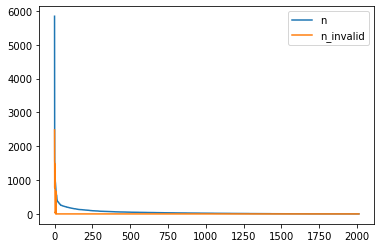

In [71]:
plt.plot(range(len(publishers)), pub_counts)
plt.plot(range(len(publishers)), invalid_counts)
plt.legend(["n", "n_invalid"])

In [5]:
dd.cluster_articles(pub_sim_mats[0], method = 'complete')
clusters = dd.get_cluster_assignments(thresh_same_doc = 0.75)
print(Counter(clusters).most_common(20))

[(0, 572), (7, 6), (1, 5), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [15]:
clust = 1
ids = np.array(pub_ids)[np.where(np.array(clusters) == clust)[0]]

for i in ids:
    print(f"____\n Paywall?: {article_df.loc[i, ['paywall']].iloc[0]} | Publisher: {article_df.loc[i, ['publisher']].iloc[0]} | Length: {len(str(pub_dict[i]))}")
    print(pub_dict[i], "\n")

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise imposition by President Donald Trump of an escalating tariff regime against Mexico sent ripples through almost every economic sector in the U.S. [Full Story] 

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise imposition by President Donald Trump of an escalating tariff regime against Mexico sent ripples through almost every economic sector in the U.S. [Full Story] 

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise imposition by President Donald Trump of an escalating tariff regime against Mexico sent ripples through almost every economic sector in the U.S. [Full Story] 

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise imposition by President Donald Trump of an escalating tariff regime against Mexico sent ripples through almost every economic sector in the U.S. [Full Story] 

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise 

In [ ]:
df = article_df[(article_df["publisher"] == publishers[2]) & (article_df["nchar"] < 1500) & (article_df["nchar"] > 1000)]
for i in df["text"]:
    print(i, "\n____________\n")

In [109]:
article_df[(article_df["publisher"] == "reddit.com") & (article_df["nchar"] < 1500)]["id"]

5              5
14            14
26            26
53            53
75            75
           ...  
100648    100648
100662    100662
100681    100681
100752    100752
100754    100754
Name: id, Length: 5117, dtype: int64

In [ ]:
np.where(np.isnan(article_df["invalid"]))

In [3]:
n = 500
sample_good = random.sample(list(article_df.loc[article_df["paywall"] == 0, "id"]), n)
sample_bad = random.sample(list(article_df.loc[article_df["paywall"] > 0, "id"]), n)
sample = sample_good + sample_bad 
article_dict = cm.dict_by_ids(article_df, sample, para_sep = para_sep)
sim_mat = cm.similarity_mat(article_dict)
dd.cluster_articles(sim_mat, method = 'complete')

Loaded documents via multiprocessing, 0.61m elapsed
0 of 499500 comparisons made, 0.62m elapsed
10000 of 499500 comparisons made, 0.77m elapsed
20000 of 499500 comparisons made, 0.89m elapsed
30000 of 499500 comparisons made, 1.00m elapsed
40000 of 499500 comparisons made, 1.19m elapsed
50000 of 499500 comparisons made, 1.33m elapsed
60000 of 499500 comparisons made, 1.47m elapsed
70000 of 499500 comparisons made, 1.63m elapsed
80000 of 499500 comparisons made, 1.79m elapsed
90000 of 499500 comparisons made, 1.95m elapsed
100000 of 499500 comparisons made, 2.11m elapsed
110000 of 499500 comparisons made, 2.32m elapsed
120000 of 499500 comparisons made, 2.46m elapsed
130000 of 499500 comparisons made, 2.61m elapsed
140000 of 499500 comparisons made, 2.79m elapsed
150000 of 499500 comparisons made, 2.90m elapsed
160000 of 499500 comparisons made, 3.14m elapsed
170000 of 499500 comparisons made, 3.23m elapsed
180000 of 499500 comparisons made, 3.35m elapsed
190000 of 499500 comparisons ma

array([[4.000e+00, 4.500e+01, 0.000e+00, 2.000e+00],
       [6.450e+02, 8.700e+02, 0.000e+00, 2.000e+00],
       [4.880e+02, 8.440e+02, 0.000e+00, 2.000e+00],
       ...,
       [9.970e+02, 1.995e+03, 1.000e+00, 9.970e+02],
       [1.297e+03, 1.996e+03, 1.000e+00, 9.990e+02],
       [9.990e+02, 1.997e+03, 1.000e+00, 1.000e+03]])

[(499, 25), (475, 19), (483, 19), (537, 15), (4, 14), (485, 7), (96, 6), (527, 6), (54, 5), (523, 4), (557, 4), (629, 4), (57, 3), (143, 3), (496, 3), (505, 3), (534, 3), (543, 3), (546, 3), (576, 3)]


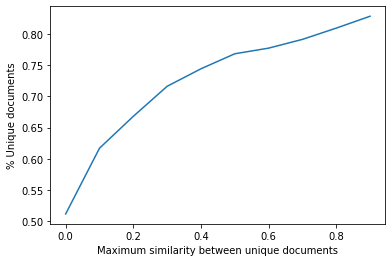

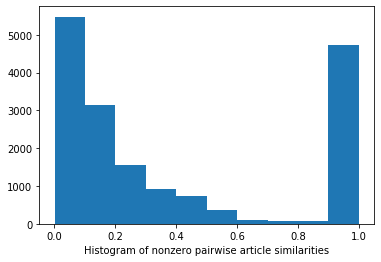

In [52]:
dd.cluster_articles(sim_mat, method = 'complete')
plt.plot([i/100 for i in range(0, 100, 10)], [dd.prop_unique_clusters(thresh_same_doc = i/100) for i in range(0, 100, 10)])
plt.xlabel("Maximum similarity between unique documents")
plt.ylabel("% Unique documents")
#plt.figure()
#plt.hist(utils.flatten(sim_mat))
#plt.xlabel("Histogram of pairwise article similarities")
plt.figure()
plt.hist(sim_mat[np.where(sim_mat > 0)])
plt.xlabel("Histogram of nonzero pairwise article similarities")
clusters = dd.get_cluster_assignments(thresh_same_doc = 0.75)
print(Counter(clusters).most_common(20))

____
 Paywall?: 0.5 | Publisher: reddit.com | Length: 302
 10,000 Episodes On Demand
 Ready. Set. Binge!     Learn more
 Stream Live TV 24/7
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.    Watch new episodes the next day just by streaming on your device of choice.   Get the app 

____
 Paywall?: 0.5 | Publisher: reddit.com | Length: 302
 10,000 Episodes On Demand
 Ready. Set. Binge!     Learn more
 Stream Live TV 24/7
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.    Watch new episodes the next day just by streaming on your device of choice.   Get the app 

____
 Paywall?: 0.5 | Publisher: reddit.com | Length: 302
 10,000 Episodes On Demand
 Ready. Set. Binge!     Learn more
 Stream Live TV 24/7
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.    Wat

Text(0.5, 1.05, 'Mean similarity: 1.0')

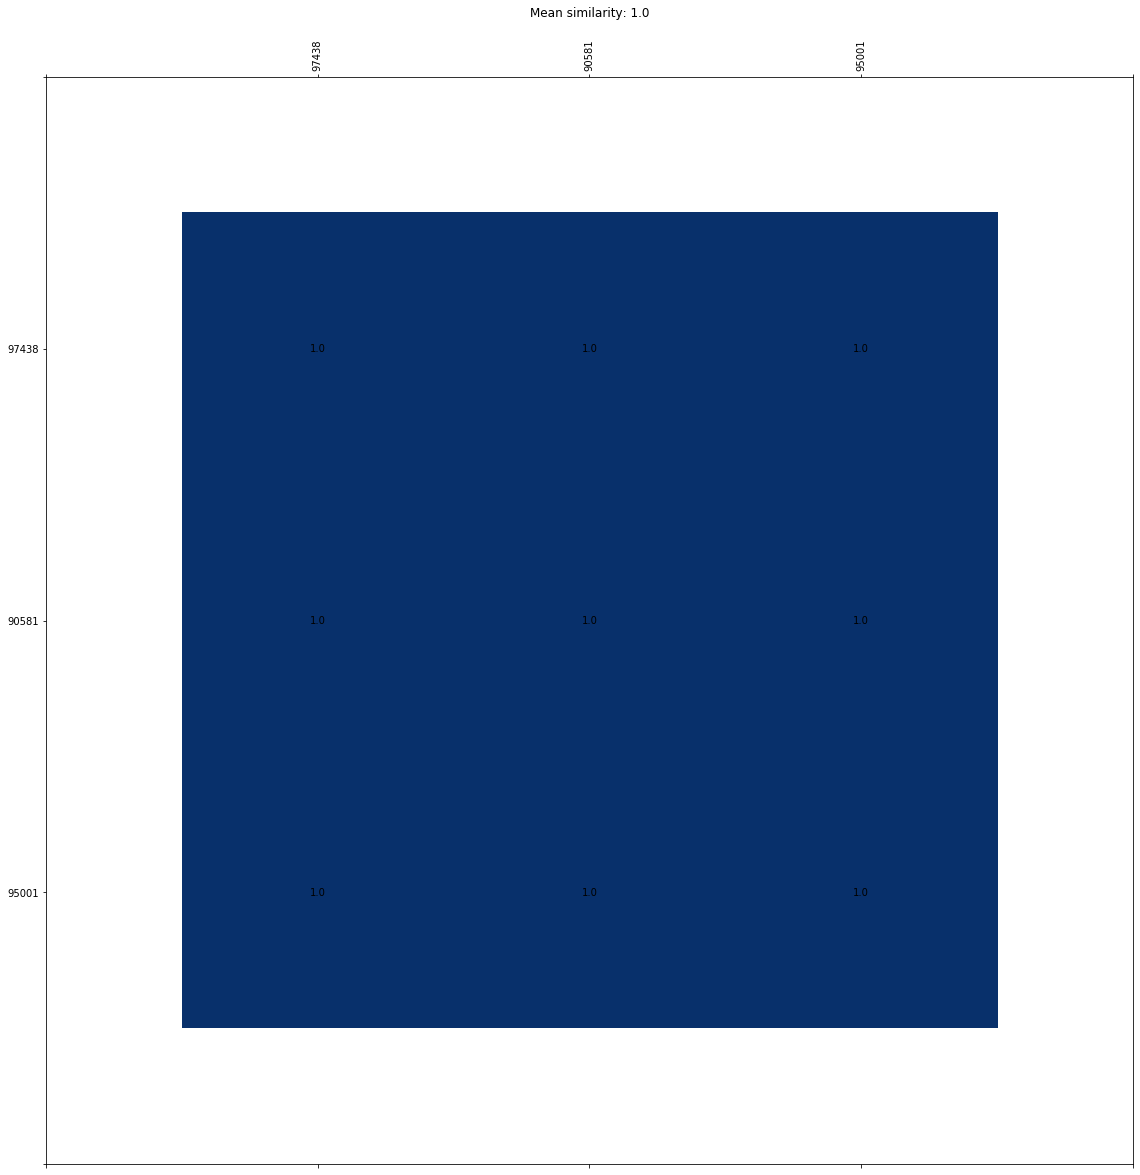

In [80]:
# non-trash: 
# 96: 6 identical articles, dif websites, all >5000 chars
#
clust = 576
ids = np.array(sample)[np.where(np.array(clusters) == clust)[0]]

clust_dict = dd.dict_by_ids(article_df,  ids)


for i in ids:
    print(f"____\n Paywall?: {article_df.loc[i, ['paywall']].iloc[0]} | Publisher: {article_df.loc[i, ['publisher']].iloc[0]} | Length: {len(str(clust_dict[i]))}")
    print(clust_dict[i], "\n")

clust_sim_mat = dd.similarity_mat(clust_dict)
utils.display_mat(clust_sim_mat, xlabs = list(ids))
plt.title(f"Mean similarity: {np.mean(clust_sim_mat)}")


0.9028994576554028
Businesses warn Trump of consequences of new Mexican tariffs
 Jill Colvin And Colleen Long, The Associated Press
 Jun 1, 2019 at 12:01 AM
 WASHINGTON (AP) " Despite pushback from U.S. business, Mexico and Capitol Hill, President Donald Trump is doubling down on his threat to slap a 5% tariff on Mexican imports unless America's southern neighbor cracks down on Central American migrants trying to cross the U.S. border.
 U.S. manufacturers said the tariff, set to take effect June 10, would have devastating consequences on them and American consumers. U.S. stocks tumbled on Wall Street in response to Trump's planned action.
 "Imposing tariffs on goods from Mexico is exactly the wrong move," said Neil Bradley, executive vice president of the U.S. Chamber of Commerce, which is exploring legal action in response to the tariffs. " These tariffs will be paid by American families and businesses without doing a thing to solve the very real problems at the border. Instead, Congr

 Copyright 2019 Associated Press. All rights reserved.

S 0 : Businesses warn Trump of consequences of new Mexican tariffs 

	T 0 1.0 -1.0 :  Businesses warn Trump of consequences of new Mexican tariffs 

Jaccard Index: 1.0 with counts False
I: {'mexican', 'businesses', 'tariff', 'consequence', 'warn', 'new', 'of', 'trump'}
A-B: set() 
B-A: set()
Entities: 
-1

S 4 :  WASHINGTON (AP) " 

	T 6 1.0 1.0 :  WASHINGTON (AP) — 

Jaccard Index: 1.0 with counts False
I: {'washington', 'ap'}
A-B: set() 
B-A: set()
Entities: 
Jaccard Index: 1.0 with counts False
I: {'washington', 'ap'}
A-B: set() 
B-A: set()
1.0

S 5 : Despite pushback from U.S. business, Mexico and Capitol Hill, President Donald Trump is doubling down on his threat to slap a 5% tariff on Mexican imports unless America's southern neighbor cracks down on Central American migrants trying to cross the U.S. border. 

	T 7 1.0 1.0 : Despite pushback from U.S. business, Mexico and Capitol Hill, President Donald Trump is doubling down 

I: {'\ufeff1', 'loss', 'in', 'stock', 'will', 'be', 'monthly', 'friday', 'have', 'that', 'the', 'guarantee', '2019', 'for', 'but', 'tumble', 'may', 'all', 'market', 'on'}
A-B: set() 
B-A: set()
Entities: 
-1

S 28 : The news hit automakers particularly hard. 

	T 34 1.0 -1.0 : The news hit automakers particularly hard. 

Jaccard Index: 1.0 with counts False
I: {'the', 'particularly', 'hard', 'news', 'automaker', 'hit'}
A-B: set() 
B-A: set()
Entities: 
-1

S 29 : Many of them import vehicles into the U.S. from Mexico. 

	T 35 1.0 1.0 : Many of them import vehicles into the U.S. from Mexico. 

Jaccard Index: 1.0 with counts False
I: {'the', 'from', 'into', 'u.s.', 'mexico', 'vehicle', 'import', 'of', 'them', 'many'}
A-B: set() 
B-A: set()
Entities: 
Jaccard Index: 1.0 with counts False
I: {'mexico', 'u.s.'}
A-B: set() 
B-A: set()
1.0

S 30 : The auto sector - and the 10 million jobs it supports - relies upon the North American supply chain and cross border commerce to remain globally co

[[0, 0],
 [4, 6],
 [5, 7],
 [6, 8],
 [7, 9],
 [8, 10],
 [9, 11],
 [10, 12],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [16, 21],
 [17, 22],
 [18, 23],
 [19, 25],
 [20, 26],
 [21, 27],
 [22, 28],
 [23, 29],
 [24, 30],
 [25, 31],
 [26, 32],
 [27, 33],
 [28, 34],
 [29, 35],
 [30, 36],
 [31, 37],
 [32, 38],
 [33, 39],
 [34, 40],
 [35, 41],
 [36, 42],
 [37, 43],
 [38, 44],
 [39, 45],
 [40, 46],
 [41, 47]]

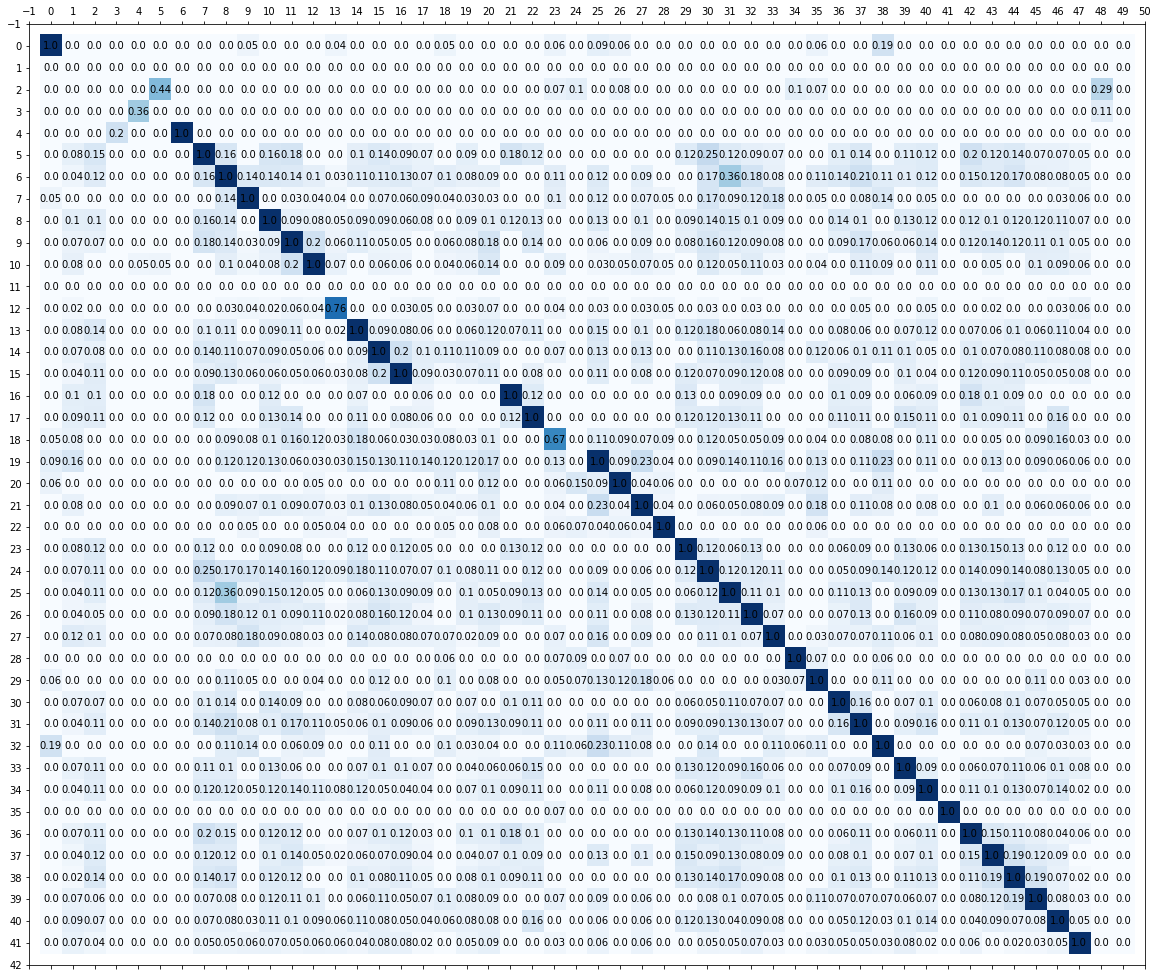

In [66]:
id1 = ids[0]
id2 = ids[1]

doc1 = article_dict[id1]
doc2 = article_dict[id2]
jac_mat = dd.get_jaccard_matrix(doc1, doc2)
utils.display_mat(jac_mat)
print(dd.jaccard_score())
print(doc1, "\n\n\n")
print(doc2)
dd.print_sentence_matches(visualize = True)

In [34]:
print(ids)
for i in ids:
    print(article_df.loc[i, ["paywall"]], len(article_df.loc[i, ["text"]].iloc[0]), article_df.loc[i, ["text"]].iloc[0])

[ 4368 41252 52174  1427 54867 60607 66885 97666 67515 98630 54885 27488
 54704  7055]
paywall    0
Name: 4368, dtype: object 650  Indeed, over the last 2 years, I've interviewed just over 900 engineers. Whether this was a good use of my time can be debated! (I sometimes wake up in a cold sweat and doubt it.) But regardless, our goal is to improve how engineers are hired.    This gives us, I think, some of the best available data on interviewing. 
 Bootcamps vs.    
 But this is not what we’ve found at Triplebyte. We do interviews with engineers, and match them with startups where they’ll be a good fit.      Each question in an interview, in contrast, lasts less than one hour.  This is a different skill.  They bring bias, pattern matching, and a lack of standardization.
paywall    0
Name: 41252, dtype: object 650  Indeed, over the last 2 years, I've interviewed just over 900 engineers. Whether this was a good use of my time can be debated! (I sometimes wake up in a cold sweat and doubt

In [20]:
article_df.loc[0, "fingerprint"]

"{'wordCounts': {'2': 1, '713350': 1, '14736': 3, '1816': 1, '571': 3, '348': 1, '910': 2, '195': 2, '3': 167, '1176': 1, '48': 10, '1177': 1, '514': 2, '1178': 1, '15': 1, '11': 11, '515': 1, '1442': 1, '876': 1, '1326': 1, '79': 8, '73': 1, '756': 6, '14108': 1, '108': 2, '2777': 9, '2775': 1, '929': 6, '3216': 1, '6199': 1, '5165': 1, '8517': 1, '1684': 2, '883': 1, '538': 1, '1534': 2, '5664': 3, '900': 1, '741': 3, '6460': 1, '12404': 1, '167': 1, '552': 1, '7642': 1, '921': 1, '838': 1, '471': 1, '5864': 1, '1410': 1, '20256': 1, '1440': 2, '56221': 1, '1956': 4, '3181': 2, '915': 1, '2269': 1, '217': 1, '2299': 1, '35': 1, '1198': 1, '8912': 1, '87': 9, '8096': 1, '383758': 1, '1446': 1, '861785': 1, '11062': 1, '58920': 1, '5654': 1, '9179': 1, '20618': 1, '21030': 1, '4124': 1, '57907': 1, '5926': 1, '2748': 1, '1435': 1, '26614': 1, '10931': 1, '359643': 1, '592': 1, '9413': 1, '37167': 1, '5663': 1, '861786': 1, '410': 1, '4911': 1, '1210': 2, '380': 1, '22386': 1, '878': 1,

In [2]:
n = 400
sample_good = random.sample(list(article_df.loc[article_df["paywall"] == 0, "id"]), n)
sample_bad = random.sample(list(article_df.loc[article_df["paywall"] > 0, "id"]), n)
sample = sample_good + sample_bad
article_dict = cm.dict_by_ids(article_df, sample, para_sep = para_sep)

for i in sample_good[0:5]:
    print("INVALID" if article_df.loc[i, "paywall"] else "ARTICLE")
    print("\n<br>\n".join(article_df.loc[article_df["id"] == i, "text"].iloc[0].split(para_sep)), "\n\n\n______\n\n\n")

ARTICLE
Jeopardy! Juggernaut James Holzhauer Is Coming for Ken Jennings' 15-Year Record 
<br>
  
<br>
 Friday 
<br>
 May 31, 2019 at 7:37 PM 
<br>
 After 32 straight wins, James Holzhauer is thiiis close to breaking the all-time Jeopardy! record for most money won, set back in 2004 by Ken Jennings. At the time, Jennings won 74 games straight and took home a prize of $2,520,700. Holzhauer, on the other hand, has won only half that number of games but has racked up $2,462,216. That leaves him $58,484 shy of Jennings record. 
<br>
 Not only that, Holzhauer also holds the record for most single-game earnings with $131,127. He's set to return to the game show on Monday, when he could break Jennings' record. 
<br>
 The show is just as impressed with Holzhauer's winning streak as we are, so much so that it made a comparison video (above), breaking down the play-by-play and numbers in comparison to Jennings' run. According to the video, Jennings had an accuracy response rate of 91%, while Holz

 For live, local news,  download the KRONon app.  It lets you watch commercial-free news from the Bay Area's Local News Station on multiple streaming devices. 


______



ARTICLE
Sedgwick County Emergency Communications police to update media policy 
<br>
 Sedgwick County Emergency Communications police to update media policy 
<br>
 By: 
<br>
 Posted: Jun 01, 2019 04:47 PM CDT 
<br>
 Updated: Jun 01, 2019 04:48 PM CDT 
<br>
 Copyright 2019 Nexstar Broadcasting, Inc. All rights reserved. This material may not be published, broadcast, rewritten, or redistributed. 
<br>
 KSN File 
<br>
 Copyright 2019 Nexstar Broadcasting, Inc. All rights reserved. This material may not be published, broadcast, rewritten, or redistributed. 
<br>
 KSN File 
<br>
 (Sedgwick County, Kan.) – Sedgwick County Emergency Communications' media policy has been updated as of Saturday, June 1. 
<br>
 This change was made at the request of the Wichita Police Department and will only apply to incidents that are under 

In [5]:
for i in sample_bad:
    print("INVALID" if article_df.loc[i, "paywall"] else "ARTICLE")
    print(article_dict[i], "\n\n\n")

INVALID
Please register or log in first. 



INVALID
DOJ surprises with omissions in response to Flynn document order
 Rachel Maddow reports on an unexpected development in the Michael Flynn case when prosecutors withheld without any real explanation some of the documents the judge had ordered them to release to the public.
 Watch TV shows , movies and more on Yahoo View .   See More
 Check out more stuff on Yahoo View
 What to Read Next 



INVALID
German Valley Days Festival to be held
 Jun 1, 2019 at 5:00 PM
 GERMAN VALLEY — The annual German Valley Days Festival will be held June 7-9 in downtown German Valley.
 The on-stage feature show will be “ The Story of the Peterson Farm Brothers,” presented by Greg Peterson, at 7:30 p.m. June 8. Peterson is the oldest of the three brothers, who, along with their sister and parents, operate a fifth-generation farm near Assaria, Kansas, raising beef cattle and various crops. They advocate for agriculture through social media and by speaking en

The document has moved here .
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 



INVALID
You have two-factor authentication enabled on this account because you're awesome. 



INVALID
 To see how, and to learn how to control cookies, please read our Privacy Policy and Cookie Policy .   To see how, and to learn how to control cookies, please read our Privacy Policy and Cookie Policy .
 Sorry, no headlines or news topics were found. Please try different keywords. 



INVALID
 1st £88, Others £35   Race Total £263
 Ashley Iveson previews Saturday's meetings and he thinks Madhmoon could be the value call in the Investec Derby at Epsom.
 Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 



INVALID
Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts
  Are you over eighteen and willing to see adult content? 



  Are you over eighteen and willing to see adult content? 



INVALID
Andy Ruiz 20lbs heavier than Anthony Joshua
 Anthony Joshua 247.8 vs. Andy Ruiz Jr 268
 (WBA, IBF, WBO heavyweight titles)
 Callum Smith 167.6 vs. Hassan N’Dam 166
 (WBA super middleweight title)
 Katie Taylor 134.6 vs. Delfine Persoon 130.6
 (WBA/WBC/IBF/WBO female lightweight titles)
 Chris Algieri vs. 139.8 vs. TommyCoyle 139.6
 Josh Kelly 146.4 vs. Ray Robinson: 146
 Venue: Madison Square Garden, NYC 



INVALID
Woman’s body in trash can identified; cause of death unknown | Centre Daily Times
 Woman’s body in trash can identified; cause of death unknown
 Authorities say they have identified a woman whose body was found wrapped in plastic in a trash can in northeast Philadelphia.
 Police say the victim was identified as 36-year-old Kioma Diehl, but the cause of her death remains under investigation.
 Authorities said earlier that a garbage company worker found her body wrapped in plastic and inside a plastic trash

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.    Read more about this and your right to opt-out in our Privacy Policy 



INVALID
Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 



INVALID
Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 



INVALID
He endured shootings at Virginia Tech and Virginia Beach
 Virginia Beach City Councilman Aaron Rouse tells CNN's Chris Cuomo about how he lived through the 2007 shooting at Virginia Tech only to be visited by similar circumstances in the community he now serves. 



INVALID
Pilot identified in Cape May plane crash 



INVALID
Please purchase a subscription to continue reading.
 A subscription is required to continue reading.
 Thank you for reading PressofAtlanticCity.com.   Please c

 Arrow keys when menus are open : Navigate the focused menu. 



INVALID
 The page you requested was not found. You may have followed an old link or typed the address incorrectly.
 We've also been doing some house cleaning so the page may have been moved or removed.   Or you may be interested in today's top stories. 



INVALID
 The Brit Floyd phenomenon has been embraced by Pink Floyd fans worldwide. One of its concerts was the subject of a PBS special in 2013. The band boasts of its note-for-note perfection, unique Floydian animation, its state-of-the art sound and lights.
 www.britfloyd.com   Every patron must have a ticket regardless of age. Babes in arms not permi 



INVALID
 For feedback and support, contact feedback@yardbarker.com .
 For general business inquiries, contact info@yardbarker.com .
 For all advertising inquiries, contact sales@yardbarker.com .   You can also check our Jobs page for listings when they are available. 



INVALID
Dogs seized from mansion getting care


 Photos by CHRISTIAN MURDOCK, THE GAZETTE 



INVALID
 But we will listen to a fellow sufferer’s story.   They are also better able to tell their stories of suffering that have been redeemed in Christ.   
 After reading these stories, you won’t walk away with five things to do to relieve your pain.   



INVALID
Please register or log in first. 



INVALID
Thank you for Reading.   We offer readers 10 free articles every 30 days, and you have 0 remaining. Want more?    Want more?   Support local journalism and subscribe today with our special low introductory rate of $2.95/month.
 Thank you for signing in!   We offer readers 10 free articles every 30 days, and you have remaining. 



INVALID
Please enter a valid e-mail address
 Password must be 6-20 characters
 registration failed,Please try another Email 



INVALID
 This programme will be available shortly after broadcast
 The latest five minute news bulletin from BBC World Service.
 BBC World Service Online, Americas and the Caribbea

 Police said the victim was taken to Parkland Memorial Hospital in critical condition, and died there. 



INVALID
Separate names with a comma.
 iPad Mini 4 Upgrade to Mini 5 or Air 3?
 I figure it's time to upgrade from my iPad Mini 4.   Other than size and $100 price difference, are the current Mini 5 and Air 3 about equal?   Is there a major preference from users here?   I'm leaning towards the Mini 5 just because I'm used to the form factor, but just wanted to see if I'd be missing on any performance or other feature by not going to the Air 3.   Thanks! 



INVALID
Thank you for Reading! We hope that you continue to enjoy our free content.
 Thank you for Reading!
 Please log in, or sign up for a new account and purchase a subscription to continue reading.
 Please purchase a subscription to continue reading.
 Your current subscription does not provide access to this content. 



INVALID
 A business model describes the rationale of how an organization creates, delivers, and captures 

 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-question survey. 



INVALID
The document has moved here .
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 



INVALID
 All rights reserved.   By clicking 'X' or continuing to use the site, you agree to allow cookies to be placed. To find out more, visit our cookies policy and our privacy policy .
 All-access pass to the top stories, events and offers around town. 



INVALID
Feed suspended! Please contact the owner. March 1, 2019
 The Event Chronicle is a daily alternative news blog for people interested in seeking truth and exploring alternate view points not covered in the mainstream. 



INVALID
 Thank you for reporting this station. We will review the data in question.
 You are about to report this weathe

 Partly cloudy. High around 75F. Winds E at 10 to 20 mph. 



INVALID
 Subscribe to the FT to read: Financial Times Ecstatic, erotic abandon — American Ballet Theatre performs Twyla Tharp’s Deuce Coupe
 Be a global citizen.
 Become an FT Subscriber.  
 Choose the subscription that is right for you
 Not sure which package to choose? Try full access for 4 weeks
 $1.00 for 4 weeks*
 For 4 weeks receive unlimited Premium digital access to the FT's trusted, award-winning business news 



INVALID
 Thank you for reporting this station. We will review the data in question.
 You are about to report this weather station for bad data. Please select the information that is incorrect. 



INVALID
Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 



INVALID
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details.
 Your email was 

In [7]:
#sample = random.sample(list(article_df["id"]), 50)
#sample = sample_good
# article_dict = dd.dict_by_ids(article_df, sample)
sim_mat = cm.similarity_mat(article_dict)

0 of 319600 comparisons made, 1.17m elapsed
10000 of 319600 comparisons made, 1.32m elapsed
20000 of 319600 comparisons made, 1.49m elapsed
30000 of 319600 comparisons made, 1.60m elapsed
40000 of 319600 comparisons made, 1.77m elapsed
50000 of 319600 comparisons made, 1.94m elapsed
60000 of 319600 comparisons made, 2.11m elapsed
70000 of 319600 comparisons made, 2.25m elapsed
80000 of 319600 comparisons made, 2.40m elapsed
90000 of 319600 comparisons made, 2.56m elapsed
100000 of 319600 comparisons made, 2.74m elapsed
110000 of 319600 comparisons made, 2.87m elapsed
120000 of 319600 comparisons made, 3.05m elapsed
130000 of 319600 comparisons made, 3.18m elapsed
140000 of 319600 comparisons made, 3.32m elapsed
150000 of 319600 comparisons made, 3.43m elapsed
160000 of 319600 comparisons made, 3.54m elapsed
170000 of 319600 comparisons made, 3.66m elapsed
180000 of 319600 comparisons made, 3.79m elapsed
190000 of 319600 comparisons made, 3.90m elapsed
200000 of 319600 comparisons made,

[(427, 27), (390, 18), (397, 11), (413, 9), (483, 8), (411, 5), (414, 5), (423, 5), (108, 4), (416, 4)]


Text(0, 0.5, '% Unique documents')

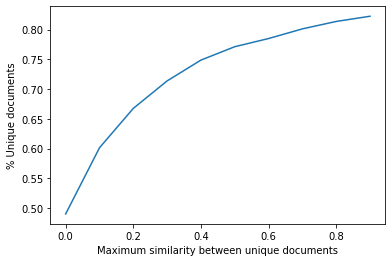

In [12]:
dd.cluster_articles(sim_mat, method = 'complete')
clusters = dd.get_cluster_assignments(thresh_same_doc = 0.8)
print(Counter(clusters).most_common(10))
plt.plot([i/100 for i in range(0, 100, 10)], [dd.prop_unique_clusters(thresh_same_doc = i/100) for i in range(0, 100, 10)])
plt.xlabel("Maximum similarity between unique documents")
plt.ylabel("% Unique documents")

(array([3622., 2246., 1078.,  598.,  536.,  266.,   48.,  124.,   20.,
        3748.]),
 array([0.00134409, 0.10120968, 0.20107527, 0.30094086, 0.40080645,
        0.50067204, 0.60053763, 0.70040323, 0.80026882, 0.90013441,
        1.        ]),
 <a list of 10 Patch objects>)

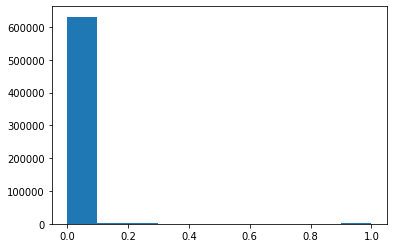

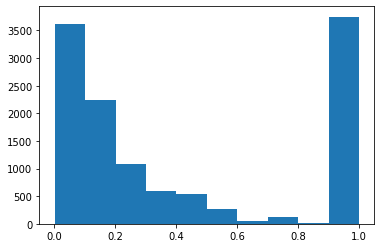

In [13]:
plt.hist(utils.flatten(sim_mat))
plt.figure()
plt.hist(sim_mat[np.where(sim_mat > 0)])

In [62]:
np.where((sim_mat > 0.8) * (sim_mat < 0.85))

(array([512, 538, 538, 538, 621, 633, 673, 725, 756, 778], dtype=int64),
 array([538, 512, 621, 633, 538, 538, 725, 673, 778, 756], dtype=int64))

In [61]:
sim_mat[np.where((sim_mat > 0.8) * (sim_mat < 0.85))]

array([0.83275261, 0.83275261, 0.83275261, 0.83275261, 0.83275261,
       0.83275261, 0.84259259, 0.84259259, 0.84337349, 0.84337349])

In [16]:
ids_unique = [sample[np.where(clusters == c)[0][0]] for c in np.unique(clusters)]

In [17]:
print(len(np.unique(clusters)))
texts = [article_df.loc[article_df["id"] == i, "text"].iloc[0] for i in ids_unique]
texts = ["###".join(txt.split(para_sep)) for txt in texts]

651


In [18]:
texts_df = pd.DataFrame({'id': ids_unique, 
                        'text': texts,
                        'date': "060119",
                        'article_prior': [1 if i in sample_good else -1 for i in ids_unique],
                        'snippet': None,
                        'snip_sent_inds': None,
                        'html': None})

In [19]:
texts_df

,id,text,date,article_prior,snippet,snip_sent_inds,html
0,43401,Jeopardy! Juggernaut James Holzhauer Is Coming...,060119,1,None,None,None
1,79365,"After making the choice to stay alive, amputee...",060119,1,None,None,None
2,32373,3 arrested in East San Jose for sex traffickin...,060119,1,None,None,None
3,37363,Sedgwick County Emergency Communications polic...,060119,1,None,None,None
4,57427,Some of the most recent deadly US mass shootin...,060119,1,None,None,None
...,...,...,...,...,...,...,...
646,44223,© 2019 Patch Media. All Rights Reserved. ### ...,060119,-1,None,None,None
647,8628,Caddy uncovers the potent replacements for the...,060119,-1,None,None,None
648,59286,Demonstrator Snatches Mic From Sen. Harris Dur...,060119,-1,None,None,None
649,48158,© 2019 | All Rights Reserved | Lewiston Sun Jo...,060119,-1,None,None,None


In [20]:
texts_df.iloc[0]["text"]

'Jeopardy! Juggernaut James Holzhauer Is Coming for Ken Jennings\' 15-Year Record ###  ### Friday ### May\xa031,\xa02019\xa0at\xa07:37\xa0PM ### After 32 straight wins, James Holzhauer is thiiis close to breaking the all-time Jeopardy! record for most money won, set back in 2004 by Ken Jennings. At the time, Jennings won 74 games straight and took home a prize of $2,520,700. Holzhauer, on the other hand, has won only half that number of games but has racked up $2,462,216. That leaves him $58,484 shy of Jennings record. ### Not only that, Holzhauer also holds the record for most single-game earnings with $131,127. He\'s set to return to the game show on Monday, when he could break Jennings\' record. ### The show is just as impressed with Holzhauer\'s winning streak as we are, so much so that it made a comparison video (above), breaking down the play-by-play and numbers in comparison to Jennings\' run. According to the video, Jennings had an accuracy response rate of 91%, while Holzhauer

In [21]:
article_dict[texts_df["id"][0]]

In [25]:
for i in range(len(texts_df)):
#for i in range(3):
    nsents = 5
    # doc = article_dict[texts_df["id"][i]]
    doc = docs.Document(texts_df.iloc[i]["text"], para_sep = "###", clean = False)
    sents = doc.get_sentences()
    
    if sents is None or len(sents) == 0:
        snippet = ""
        html = ""
        texts_df.loc[i, ["snippet", "snip_sent_inds", "html"]] = [snippet, [], html]
        continue
        
    start_sent = random.randint(0, max(len(sents) - nsents, 0))
    start_para = doc.sent_para_map[start_sent]
    end_para = doc.sent_para_map[min(start_sent + nsents, len(sents) - 1)]

    para_range = range(start_para, end_para + 1)
    sent_inds = [i for i in range(len(sents)) if doc.sent_para_map[i] in para_range]
    sents[sent_inds]
    paras = [(" ").join([sents[i].strip() for i in np.where(doc.sent_para_map == para)[0]]) for para in para_range]
    
    snippet = "###".join(paras)
    html = "<p>" + "</p><p>".join(paras) + "</p>"
    texts_df.loc[i, ["snippet", "snip_sent_inds", "html"]] = [snippet, sent_inds, html]
                                
    
    print("\n__________\n", snippet)
    #print(doc.get_sentences(), doc.sent_para_map, random.randint(0, max(len(sents) - 11, 0)))


__________
 Friday###May 31, 2019 at 7:37 PM###After 32 straight wins, James Holzhauer is thiiis close to breaking the all-time Jeopardy! record for most money won, set back in 2004 by Ken Jennings. At the time, Jennings won 74 games straight and took home a prize of $2,520,700. Holzhauer, on the other hand, has won only half that number of games but has racked up $2,462,216. That leaves him $58,484 shy of Jennings record.

__________
 Chemotherapy made her very weak and rehabilitation was a difficult process, but she was determined to get out of hospital and be home for Christmas.###" That was my aim, to get home and be able to cook, do the dishes, just do all those mundane things — to feel like you're worthwhile, to feel like you're still a mum," she said.###After fighting for her life and surviving cancer, Ms Villis had to learn to live without her leg and hip.###" Just mentally, I'm pretty independent and strong minded, so I just wanted to be able to do most things myself , I didn

 “ The Democrat Party is unhinged! Their radical position on abortion is horrible!” Trump wrote Thursday on Twitter, linking to a Townhall report about the bill.###While the mainstream media focuses on pro-life laws being passed in Louisiana, Georgia and Missouri, radical pro-abortion bills in Illinois, Vermont and Rhode Island largely have gone unnoticed by the national press.###Trump is one of the few people with a huge platform who has been raising awareness about these bills.###Click here to sign up for pro-life news alerts from LifeNews.com###If the Illinois bill passes the state Senate, abortion clinic regulations could be a thing of the past. Among other things, the Illinois Reproductive Health Act would repeal state abortion clinic regulations and the state partial-birth abortion ban.

__________
 GOLF -- Paxton Park will host the James Marine Greater Paducah Amateur 2-Player Team Championships June 22-23. Tournament format will be a 36 hole 2-player scramble and flights will b

 Unable to afford a trip to the city for school, these children have to depend on the shabby boathouse where they learn how to read and write and gain other knowledge about life outside their world of fishing.###The school relies on electricity from solar panels, installed by a company as its CSR project. Some classes are actually pre-recorded classes kept on a pile of DVDs. It's absurd and unbelievable that the state leaves the issue of education and welfare for these children at the mercy of big conglomerates, which run charities to promote their image and businesses.###Of course, this boathouse school isn't on Obec's merger target list. However, it can provide an idea of how small schools can be important for children. Obec should make education planners rethink how to design a curriculum that is more relevant for each region, provide sufficient tools and necessities so that children can attend classes in a better environment as the state aggressively touts "Thailand 4.0".

________

 Moving to a different city doesn't necessarily mean you'll force yourself out of a job. If you make a strong enough case to stay with your company, you may get to remain on board after all. And that, in turn, will give you one less thing to stress about in the course of your move. For example: one easy trick could pay you as much as $16,728 more... each year! Simply click here to discover how to learn more about these strategies .###The Motley Fool has a disclosure policy .

__________
 NORTH CALDWELL, N.J. (AP) — Two decades after the debut of the Sopranos, the house used in the filming of the HBO series is up for sale — long driveway, kitchen island and all.###The New York Times reports that owners Patti and Victor Recchia listed the North Caldwell, New Jersey home for a “starting price” of $3.4 million.###While Zillow indicates the price is high for the area, Victor Recchia said it’s impossible to quantify “the intrinsic value” of the house that mobster Tony Soprano called home.

_

 NHL Deputy Commissioner Bill Daly said the league interviewed Kuznetsov among its “fact-finding steps. ”###“While we certainly do not condone or endorse some of the decisions he made on the night in question, Mr. Kuznetsov’s account of the events that transpired aligns with other information we have been able to gather, and we have found no basis to question his representations with respect to what did — and what did not — occur,” Daly said. “ We consider the matter formally closed. ”

__________
 Serena Williams of the U.S. leaves after losing her third round match of the French Open tennis tournament against Sofia Kenin of the U.S. in two sets, 2-6, 5-7, at the Roland Garros stadium in Paris, Saturday, June 1, 2019.###Christophe Ena###Sofia Kenin of the U.S. celebrates winning her third round match of the French Open tennis tournament against Serena Williams of the U.S. in two sets 6-2, 7-5, at the Roland Garros stadium in Paris, Saturday, June 1, 2019.###Christophe Ena###Serena Wil


__________
 The last victim was said to be a contractor. Gov. Ralph Northam tweeted a list of the victims' names. " They leave a void we will never be able to fill," City Manager Dave Hansen told reporters.###Meanwhile, more on Craddock, a 40-year-old who police Chief James Cervera said engaged in a "long gunbattle" with cops before he was fatally shot, per CNN .###Craddock was said to be a certified professional engineer with the public utilities department, and a 1996 news report noted he'd served in the Army National Guard.###His record on first search seems to be mostly clean, with just a 2013 motor vehicle infraction.

__________
 Close###In this Thursday, May 23, 2019, photo, a crane lifts a shipping container at a port in Qingdao in eastern China's Shandong province. China issued a report Sunday, June 2, 2019, blaming the United States for a trade dispute and said it won't back down on "major issues of principle. " The statement from the Cabinet spokesman's office said that Chi

 †No Interest if Paid in Full within 6, 12, 24 Months: Available on purchases on Samsung.com charged to a Samsung Financing Program Account. On purchases of $250 to $499.99 for 6-month, $500 or more for 12-month or 24-month. To avoid interest, you must pay the full promo balance before the promo period ends. If you do not, we will charge interest from the purchase date at the standard Purchase APR. After the promo period ends, the standard APR also applies to the remaining balance and the charged interest. You are required to make minimum payments, but minimum payments will not pay off the balance on time. You must make larger payments to avoid the interest. Advertised monthly payment, if any, is greater than your required minimum monthly payment and excludes taxes, delivery or other charges. Limited Time Offer. Regular account terms apply to non-promo purchases. Minimum interest charge: $1. Standard Purchase APR: 29.99%. Prior purchases excluded. Account must be in good standing. Subj

 " We wanted to give fans a taste of the new season of Stranger Things and are thrilled to partner with Netflix to give customers across the country an experience straight out of Hawkins, Indiana," Baskin-Robbins said in a press release . " Whether you love the show or just love some seriously delicious ice cream creations, we've got something for everyone. "###While you can enjoy the show-inspired treats and merchandise starting in June, fans will have to wait a little longer to binge the series as season three of Stranger Things premieres July 4th on Netflix.

__________
 PUBLISHED: SUNDAY, JUNE 2, 2019 AT 12:30 AM###PREV###A A###CANTON — Chloe K. Renaud, St. Lawrence County ’s Dairy Princess for 2019, has had a busy week.

__________
 Recent international event topics have included “Top 5 reasons to invest in the non-conventional investment sector” (London), “How is money going to be raised using digital securities? ” (New York), “Why fixed income alternative investments? ” (Los Ang

 Scott made those comments hours after agreeing to return the equipment from Adachi that police seized in the raid.###After Scott's reversal and apology, the San Francisco Police Officers Association called for his resignation.###Staff writer Thomas Peele contributed to this report.###The-CNN-Wire ™ & © 2019 Cable News Network, Inc., a Time Warner Company. All rights reserved.

__________
 The announcement was made on social media with a teaser video that showed snowy mountains, as the camera dips toward icy waters. (Courtesy of SeaWorld)###SeaWorld Orlando Confirms New Coaster for 2020###By Ashley Carter###PUBLISHED 12:28 PM ET Jun. 01, 2019 PUBLISHED June 1, 2019 @12:28 PM

__________
 FRAMINGHAM - The city held its inaugural Pride Flag Raising Ceremony on Saturday in the Memorial Plaza of City Hall. The event was arranged to kick off Pride Month, which encourages and promotes diversity, tolerance and inclusiveness.###Speakers included Mayor Yvonne Spicer, Superintendent of Schools R

 Prosecutors requested that Aguilera-Mederos be required to wear a GPS monitor, but the judge denied that on Friday.###The Houston, Texas man is facing 40 charges in connection with the April 25 crash in Lakewood, including charges for vehicular homicide, assault and attempted assault. As a result of the charges, Aguilera-Mederos faces decades in the department of corrections, the First Judicial District Attorney's Office said.###RELATED: Bond set for man accused of causing fiery crash on I-70 that killed 4###According to Lakewood police, Aguilera-Mederos was at the wheel of a tractor-trailer rig hauling lumber when it barreled into a traffic backup at speeds estimated as high as 100 mph. He said his brakes went out while coming down I-70 from the mountains. Prosecutors said they have no way to prove that because his semi was destroyed in the crash.

__________
 Saudi King Salman, center, chairs the Islamic Summit of the Organization of Islamic Cooperation (OIC) in Mecca, Saudi Arabia,

 Texas (TX) All or Nothing Evening Prize Payouts for Sat, Jun 1, 2019###Evening###Other times a zero value may be shown for prizes with no money value, such as a free ticket. In that case we will show a description of the prize in the "Match" column. For example, Mega Million's Megaplier feature. Our prize payout table only shows the payouts for the regularly-scheduled drawing. It is possible that the bonus/extra drawing has different payout amounts.

__________
 SYDNEY, May 31, 2019 - (ACN Newswire) - Novotech, the Asia-Pacific CRO, has again won the prestigious Asia-Pacific CRO of the year awarded by leading analyst firm Frost & Sullivan. This is the fifth year Novotech has been awarded the top CRO for the region which focusses on best practices in clinical research for biotechs.###The announcement was made at the ASCO Annual Meeting (May 31 - June 4, 2019 McCormick Place, Chicago, IL)###Dinesh Sampath Rangaraj, Vice President Healthcare, Frost & Sullivan said: "Novotech is internati

 The search giant was fined a record $2.72 billion by European regulators in 2017 for abusing its dominance of the online search market. In the U.S., the Federal Trade Commission made an antitrust investigation of Google but closed it in 2013 without taking action.###Now the Justice Department has undertaken an antitrust probe of the company's search and other businesses, according to reports by The Wall Street Journal, The New York Times and Bloomberg News. They cited unnamed people familiar with the matter.###A Google spokeswoman didn't immediately respond to a request for comment from The Associated Press. Justice Department spokespeople couldn't immediately be reached.

__________
 Get commemorative tickets from Stanley Cup Playoffs games###Get commemorative tickets from Stanley Cup Playoffs games###by                                             Magali Valiente / St. Louis Blues###There's no better way to remember the Stanley Cup Playoffs than having a ticket from your most memorab

 Image source: Getty Images.###A chip off the old block###NVIDIA had been riding high, experiencing a trifecta of growth catalysts: strong demand for its graphics processing units (GPUs) from gamers, increasing adoption for data centers and artificial intelligence, and significant demand generated by those mining cryptocurrency -- all contributing to the stock's multi-year run. The bottom dropped out late last year when growth in two of sources seemed to dry up. The cryptocurrency bubble burst, reducing demand for GPUs and leaving excess inventory in the channel. Then, weaker demand from its booming data center segment caused a year-over-year decline of 10% -- after years of double- and even triple-digit gains in the segment.

__________
 Facebook Twitter Reddit Pinterest Email###After George Soros referred to social media as a “menace to society” the controversial billionaire had a change of heart and began buying it up.###(RT) Months after denouncing social media as a “menace to soci

 You're more than just a number. You're lots of numbers. Numbers that Highmark Blue Cross Blue Shield shares with your Lehigh Valley Health Network doctors - so you get personalized care that's 3 O5326 as unique as you are. 125% 03 21 Find out how at BetterTogetherPA.com. HIGHMARK. Lehigh Valley Health Network You're more than just a number. You're lots of numbers. Numbers that Highmark Blue Cross Blue Shield shares with your Lehigh Valley Health Network doctors - so you get personalized care that's 3 O5326 as unique as you are. 125 % 03 21 Find out how at BetterTogetherPA.com. HIGHMARK . Lehigh Valley Health Network

__________
 In a death penalty case where a defendant is pleading “not guilty by reason of insanity,” as Jones is doing, the jury under state law has three main choices: “guilty,” “not guilty by reason of insanity” and “guilty but mentally ill. ” The jury also has the choice of finding Jones “not guilty,” but he has confessed to killing his five children, then driving aro

 Hailie Deegan has given dad — a 10-time X-Games medalist and founding member of the Metal Mulisha — little reason to worry on the race track. All the teen sensation has done is put the sport on notice that she could be one of the next wave of stars in NASCAR — but please, no D word.###Danica.###Deegan has been a force driving in the entry-level ARCA Series (she finished seventh Friday at Pocono Raceway) and has a win in each of the last two NASCAR K&N Series seasons. Like many photogenic teen influencers, she's building her brand on Instagram (400,000-plus followers) and has already served as a guest host for NASCAR.com at Daytona 500 media day.

__________
 Miami Marlins (19-36, fifth in the NL East) vs. San Diego Padres (30-27, second in the NL West)###San Diego ; Saturday, 10 p.m. EDT###BOTTOM LINE: San Diego and Miami will face off at PETCO Park Saturday.###The Padres are 15-14 in home games. The San Diego offense has compiled a .234 batting average as a team this season, Eric Hos

 Genre: Comedy###Starring: Eddie Murphy, Thandie Newton, Cuba Gooding Jr.###Mild-mannered Norbit (Eddie Murphy) has always had it rough, since the day he was left abandoned at a combination Chinese restaurant and orphanage. Recently forced to marry the shrewish glutton Rasputia, he is at wit's end. Then his childhood sweetheart, Kate (Thandie Newton), moves back to town, and he tries to figure out a way back to his true love.####12. " Little Fockers" (2010)

__________
 Back to Gallery###The shooter who killed 12 people in a government office building in Virginia Beach used a firearm equipped with a suppressor that muffles the sound of gunfire. It's the nightmare scenario that gun-control advocates have warned about amid efforts in recent years to ease restrictions on the devices, which they say can help shooters escape detection and inflict more carnage.###But gun-rights advocates and most law enforcement experts say DeWayne Craddock's use of a suppressor likely had no bearing on his 

 Burst of gunfire leaves 3 dead,  more than 2 dozen injured | Belleville News-Democrat###Burst of gunfire leaves 3 dead,  more than 2 dozen injured###The Associated Press###ORDER REPRINT →###CHICAGO

__________
 ECC Procedures are in effect for audition.###An Equity monitor will be provided.###Equity’s contracts prohibit discrimination.###Always bring your Equity Membership card to auditions.

__________
 Get lunch from the best restaurants in your city. Enjoy everything from salads to poké, burgers and bowls for a price that can’t be beat.###header.cookies-description

__________
 Report Station###Thank you for reporting this station. We will review the data in question.###You are about to report this weather station for bad data. Please select the information that is incorrect.###Temperature

__________
 From the section Women's Football###BBC Sport looks back to 2007, when USA goalkeeper Hope Solo went public with her anger about being dropped for their semi-final against Brazil, wh

 @carolynporco 5 days###did anyone ask the billions of econ ly disadvantaged ppl if they wld prefer high speed internet over a future###@Astro_Jonny  @luismen1991D @cfscholarid a @AdamHugon @Forbesyone ask the 'billions of econ'ly disadvantaged ppl' if they wld prefer high-speed internet over a future secured by a healthy planet, jobs, food, shelter, etc?###This is just marketing from a guy who's also dreaming he's going to terraform Mars . I'm not buying any of it.

__________
 Route 30, 4 Miles West of Bedford###DISCOVER###VISA###MasterCard

__________
 Ryan Keith Cox: Tribute to the Virginia Beach Shooting Victim###Jun 1, 2019 at 5:46pm###

__________
 Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts###u/WinterReception4###Sometimes when I try and body kick someone, they don't react at all, kind of like when you sidestep the spinning body kick, So does anyone know which way you have to sidestep?###3

__________
 Join now to watch this vide

 Offer Condolences or Memory###Share your memories and/or express your condolences below. Fields marked with a * are required. All others are optional. Thank you for your understanding.###Name *

__________
 Events###Get Madison Magazine delivered to your office or home.###Gift subscriptions now available!

__________
 Bill Bush The Columbus Dispatch @ReporterBush###Saturday###Jun 1, 2019 at 3:40 PM###A two-vehicle crash with multiple serious injuries shut down I-71 southbound near Hudson at around 3:10 p.m.###Columbus rescue crews were working to extricate a motorist from a damaged vehicle. Southbound traffic on the freeway was being diverted off to side streets. It is unclear when the freeway will reopen.

__________
 Mostly sunny skies. High near 80F. Winds NNW at 10 to 20 mph..###Tonight###Clear to partly cloudy. Low 52F. Winds N at 10 to 20 mph.

__________
 Lauralton Hall graduation###Updated###4:00 pm EDT, Saturday, June 1, 2019###Milford,  Connecticut - Saturday, June 1, 2019: 

 Saturday, June 01, 2019 9:56 am###Top-seeded Naomi Osaka's 16-match Grand Slam winning streak ends with third-round French Open loss###The Associated Press

__________
 Partly cloudy. A stray shower or thunderstorm is possible. Low around 50F. Winds SE at 5 to 10 mph.###Tomorrow 06/02###Partly cloudy. A stray shower or thunderstorm is possible. High around 75F. Winds E at 10 to 20 mph.###Sun

__________
 Be a global citizen.###Become an FT Subscriber.###Choose the subscription that is right for you###Trial###Not sure which package to choose? Try full access for 4 weeks

__________
 Create your account###Why you need to check your credit report every year###Published: Friday, May 31, 2019 @ 2:20 PM###By: Craig Johnson -      Clark.com###

__________
 Bilderberg 2019, Army Twitter, Dumb Locks – # NewWorldNextWeek###Watch this video on BitChute / DTube / YouTube###This week on the New World Next Week: Bilderberg slithers off to Switzerland for 2019; the US Army pwns themselves on Twitter

In [29]:
print(len(texts_df))
texts_df.to_csv("mturk_text_scrapes.csv", index = False)

651


In [32]:
texts_df.iloc[random.sample(range(len(texts_df)), 50)].to_csv("mturk_scrapes_sample.csv", index = False)

In [56]:
Counter(clusters).most_common(70)

[(427, 27),
 (390, 18),
 (397, 11),
 (413, 9),
 (483, 8),
 (411, 5),
 (414, 5),
 (423, 5),
 (108, 4),
 (416, 4),
 (417, 4),
 (6, 3),
 (185, 3),
 (408, 3),
 (418, 3),
 (430, 3),
 (449, 3),
 (499, 3),
 (0, 2),
 (10, 2),
 (31, 2),
 (36, 2),
 (59, 2),
 (88, 2),
 (106, 2),
 (111, 2),
 (114, 2),
 (115, 2),
 (116, 2),
 (137, 2),
 (138, 2),
 (143, 2),
 (144, 2),
 (170, 2),
 (213, 2),
 (219, 2),
 (224, 2),
 (240, 2),
 (244, 2),
 (256, 2),
 (274, 2),
 (280, 2),
 (326, 2),
 (328, 2),
 (344, 2),
 (348, 2),
 (398, 2),
 (402, 2),
 (406, 2),
 (435, 2),
 (443, 2),
 (445, 2),
 (459, 2),
 (468, 2),
 (481, 2),
 (496, 2),
 (506, 2),
 (509, 2),
 (511, 2),
 (530, 2),
 (535, 2),
 (581, 2),
 (588, 2),
 (624, 2),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (7, 1)]

0 of 2 rows completed, 0.00m elapsed


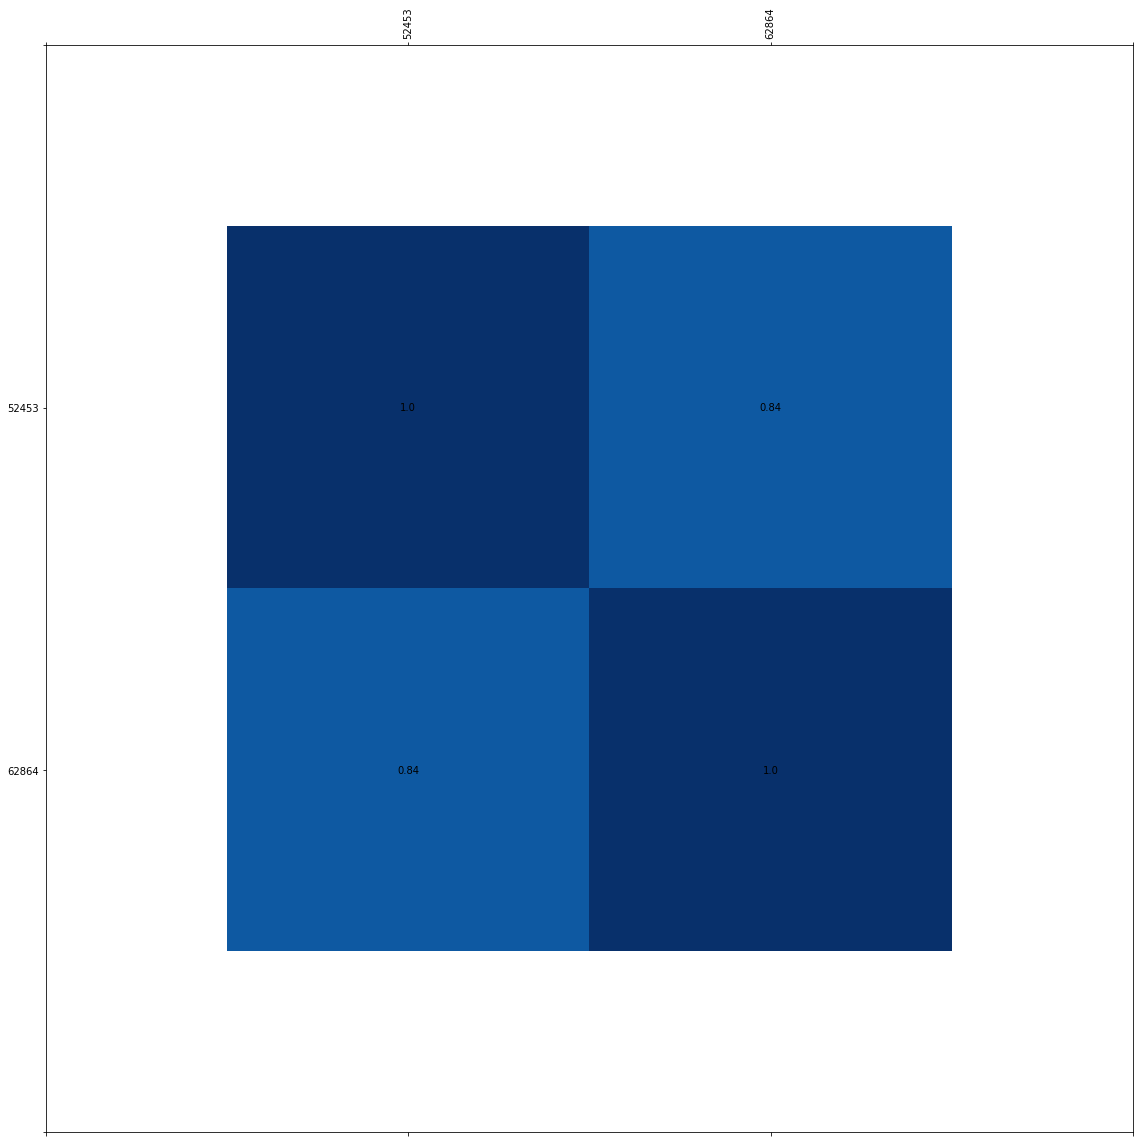

In [57]:
clust = 624
ids = np.array(sample)[np.where(np.array(clusters) == clust)[0]]
clust_dict = dd.dict_by_ids(article_df,  ids)
clust_sim_mat = dd.similarity_mat(clust_dict)
utils.display_mat(clust_sim_mat, xlabs = list(ids))

In [65]:
id1 = ids[0]
id2 = ids[1]
id1 = sample[512]
id2 = sample[538]

doc1 = article_dict[id1]
doc2 = article_dict[id2]
jac_mat = dd.get_jaccard_matrix(doc1, doc2)
print(dd.jaccard_score())
print(doc1, "\n\n\n")
print(doc2)


0.8327526132404183
Don't have an account? Sign Up Today
 Partly cloudy. High near 80F. Winds NW at 10 to 20 mph..
 Clear to partly cloudy. Low 52F. Winds N at 10 to 20 mph.
 Updated: June 1, 2019 @ 4:55 am
 2nd mental competency evaluation ordered in murder case
 HOLDREGE — A judge has ordered a second mental competency evaluation for a Holdrege man accused of a shooting that killed two men and seriously injured a third.
 The order came this week at the request of prosecutors, who cited "ambiguities and inconsistencies" in Manuel Gomez's first evaluation. Prosecutors did not elaborate on what those issues were.
 Subscribe to Breaking News 



Sunshine and clouds mixed. High near 80F. Winds NW at 10 to 20 mph..
 Clear to partly cloudy. Low 52F. Winds N at 10 to 20 mph.
 Updated: June 1, 2019 @ 3:55 am


In [66]:
print(dd.print_sentence_matches(visualize = True))


S 3 : High near 80F. 

	T 1 1.0 -1.0 : High near 80F. 

Jaccard Index: 1.0 with counts False
I: {'high', '80f.', 'near'}
A-B: set() 
B-A: set()
Entities: 
-1

S 4 : Winds NW at 10 to 20 mph.. 

	T 2 1.0 1.0 : Winds NW at 10 to 20 mph.. 

Jaccard Index: 1.0 with counts False
I: {'nw', '10', 'mph', 'to', 'winds', '20', 'at'}
A-B: set() 
B-A: set()
Entities: 
Jaccard Index: 1.0 with counts False
I: {'winds nw'}
A-B: set() 
B-A: set()
1.0

S 5 :  Clear to partly cloudy. 

	T 3 1.0 -1.0 :  Clear to partly cloudy. 

Jaccard Index: 1.0 with counts False
I: {'to', 'partly', 'clear', 'cloudy'}
A-B: set() 
B-A: set()
Entities: 
-1

S 6 : Low 52F. Winds N at 10 to 20 mph. 

	T 4 1.0 -1.0 : Low 52F. Winds N at 10 to 20 mph. 

Jaccard Index: 1.0 with counts False
I: {'n', '10', 'mph', '20', 'to', 'winds', 'low', '52f.', 'at'}
A-B: set() 
B-A: set()
Entities: 
-1

S 7 :  Updated: June 1, 2019 @ 4:55 am 

	T 5 0.71 -1.0 :  Updated: June 1, 2019 @ 3:55 am 

Jaccard Index: 0.7142857142857143 with coun

In [60]:
print(dd.jaccard_score(), dd.jaccard_score(weighted = False))
print(np.sum(dd.jaccard_mat * dd.jaccard_matches * dd.weight_mat * abs(dd.entities_mat)))
print(np.sum(np.max(dd.weight_mat, axis = 0)))
np.sum(dd.jaccard_mat * dd.jaccard_matches), np.min(dd.weight_mat.shape)

0.8433734939759036 0.8632478632478633
7.0
8.3


(7.769230769230769, 9)

In [20]:
N = len(article_df)
N_top50 = np.sum(1 - np.isnan(article_df["event"]))
print("Number of singletons: %d" % len(events['singletons']))
print("Number of articles clustered into top 50 events: %d/%d (.%d)" % (N_top50, N, round(N_top50/N, 2) * 100))
N_clustered = N - len(events['singletons'])
print("Number of non-singletons clustered into top 50 events: %d/%d (.%d)" % (N_top50, N_clustered, round(N_top50/N_clustered, 2) * 100))

Number of singletons: 64173
Number of articles clustered into top 50 events: 33124/100756 (.33)
Number of non-singletons clustered into top 50 events: 33124/36583 (.91)


Loaded documents via multiprocessing, 0.66m elapsed


Text(0.5, 1.0, 'Number of characters per sentence in 1000 sample articles')

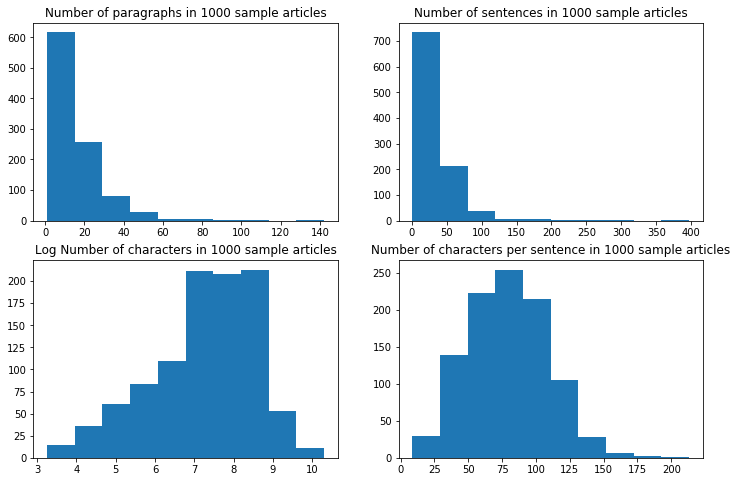

In [36]:
n = 1000
sample = random.sample(list(article_df["id"]), n)
article_dict = cm.dict_by_ids(article_df, sample, para_sep = para_sep) 
n_paras = [len(np.unique(article_dict[id].sent_para_map)) for id in article_dict.keys()]
n_sentences = [len(article_dict[id].get_sentences()) for id in article_dict.keys()]
n_chars = [len(str(article_dict[id])) for id in article_dict.keys()]

plt.subplots(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.hist(n_paras)
plt.title("Number of paragraphs in %d sample articles" % n)

plt.subplot(2, 2, 2)
plt.hist(n_sentences)
plt.title("Number of sentences in %d sample articles" % n)

plt.subplot(2, 2, 3)
plt.hist(np.log(n_chars))
plt.title("Log Number of characters in %d sample articles" % n)

plt.subplot(2, 2, 4)
plt.hist([n_chars[i]/max(n_sentences[i], 1) for i in range(len(n_chars))])
plt.title("Number of characters per sentence in %d sample articles" % n)

[(3.0, 0.26707317073170733), (8.0, 0.4026666666666667), (15.0, 1.0), (51.0, 1.0), (54.0, 0.5774058577405857)]


Text(0.5, 1.0, "Number of 'good' and 'bad' articles per Event cluster")

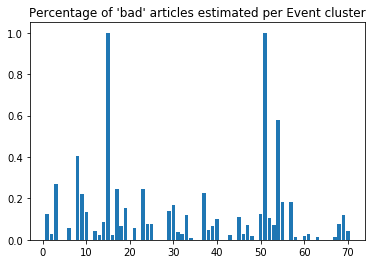

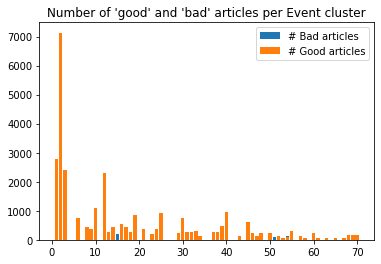

In [39]:
bad_prop = [np.mean(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in event_names]
plt.bar(event_names, bad_prop)
plt.title("Percentage of 'bad' articles estimated per Event cluster")
bad_events = event_names[np.where(np.array(bad_prop) > 0.25)]
print([(i, bad_prop[np.where(event_names == i)[0][0]]) for i in bad_events])

bad_n = [np.sum(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in event_names]
good_n = [np.sum(article_df.loc[article_df["event"] == i, "paywall"] == 0) for i in event_names]
plt.figure()
plt.bar(event_names, bad_n)
plt.bar(event_names, good_n)
plt.legend(["# Bad articles", "# Good articles"])
plt.title("Number of 'good' and 'bad' articles per Event cluster")

In [120]:
event_names[10:]

array([15., 16., 17., 18., 19., 21., 23., 24., 25., 29., 30., 31., 32.,
       33., 34., 37., 38., 39., 40., 43., 45., 46., 47., 48., 50., 51.,
       52., 53., 54., 55., 57., 58., 60., 61., 63., 65., 67., 68., 69.,
       70.])

In [126]:
# for event in event_names:
event_sim_mats = {}
suspicious_sents = Counter([])
for event in event_names:
    event_ids = np.array(article_df[(article_df["event"] == event)]["id"])
    suspicious_ids = np.array([i for i in event_ids if (article_df["nchar"][i] < 1000)])
    if len(suspicious_ids) <= 1:
        continue
    print(f"Event {event}: {len(suspicious_ids)} suspicious scrapes out of {len(event_ids)}")
    # print("event", event, np.percentile(article_df["nchar"][event_ids], [25, 50, 75]))
    sample_dict = cm.dict_by_ids(article_df, suspicious_ids, para_sep = para_sep)
    event_sim_mats[event] = cm.similarity_mat(sample_dict)
    dd.cluster_articles(event_sim_mats[event], method = 'complete')
    clusters = dd.get_cluster_assignments(thresh_same_doc = 0.75)
    clust_count = Counter(clusters)
    clusters = [i if clust_count[i] > 1 else -1 for i in clusters]
    print(Counter(clusters).most_common())
    suspicious_sents = suspicious_sents + Counter(utils.flatten([sample_dict[suspicious_ids[i]].get_sentences() for i in range(len(suspicious_ids)) if clusters[i] != -1]))

Event 1.0: 634 suspicious scrapes out of 3175
Loaded documents via multiprocessing, 0.11m elapsed
0 of 200661 comparisons made, 0.12m elapsed
10000 of 200661 comparisons made, 0.16m elapsed
20000 of 200661 comparisons made, 0.20m elapsed
30000 of 200661 comparisons made, 0.24m elapsed
40000 of 200661 comparisons made, 0.28m elapsed
50000 of 200661 comparisons made, 0.33m elapsed
60000 of 200661 comparisons made, 0.37m elapsed
70000 of 200661 comparisons made, 0.42m elapsed
80000 of 200661 comparisons made, 0.46m elapsed
90000 of 200661 comparisons made, 0.50m elapsed
100000 of 200661 comparisons made, 0.54m elapsed
110000 of 200661 comparisons made, 0.58m elapsed
120000 of 200661 comparisons made, 0.63m elapsed
130000 of 200661 comparisons made, 0.68m elapsed
140000 of 200661 comparisons made, 0.72m elapsed
150000 of 200661 comparisons made, 0.77m elapsed
160000 of 200661 comparisons made, 0.82m elapsed
170000 of 200661 comparisons made, 0.87m elapsed
180000 of 200661 comparisons made,

[(-1, 179), (9, 37), (27, 37), (26, 15), (11, 12), (28, 8), (6, 6), (20, 6), (54, 6), (13, 5), (35, 5), (49, 5), (78, 5), (63, 4), (97, 4), (3, 3), (19, 3), (23, 3), (81, 3), (103, 3), (108, 3), (148, 3), (8, 2), (21, 2), (24, 2), (38, 2), (59, 2), (69, 2), (73, 2)]
Event 31.0: 29 suspicious scrapes out of 272
Loaded documents via multiprocessing, 0.01m elapsed
0 of 406 comparisons made, 0.01m elapsed
Finished document comparisons via multiprocessing, 0.01m elapsed
[(-1, 18), (2, 7), (0, 2), (4, 2)]
Event 32.0: 16 suspicious scrapes out of 287
Loaded documents via multiprocessing, 0.00m elapsed
0 of 120 comparisons made, 0.00m elapsed
Finished document comparisons via multiprocessing, 0.00m elapsed
[(-1, 13), (1, 3)]
Event 33.0: 71 suspicious scrapes out of 351
Loaded documents via multiprocessing, 0.02m elapsed
0 of 2485 comparisons made, 0.02m elapsed
Finished document comparisons via multiprocessing, 0.03m elapsed
[(-1, 50), (8, 7), (19, 4), (9, 2), (24, 2), (25, 2), (36, 2), (43, 2

In [125]:
suspicious_sents.most_common(40)

[('FacebookEmail Twitter', 760),
 ('Google+', 760),
 ('LinkedIn Pinterest', 760),
 (" A link has been sent to your friend's email address.", 760),
 (' A link has been posted to your Facebook feed.', 760),
 (' Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80', 117),
 ('—', 111),
 (' Welcome to E-Edition Plus.', 108),
 (' The following pages are a new section of additional content not included in the newspaper, available exclusively to News+',
  108),
 ('Platinum members.', 108),
 (' Already a member?', 108),
 ('Login or Activate your account.', 108),
 (" You've reached the end of the standard E-Edition.", 108),
 (' The following', 108),
 ('E-Edition Plus pages are a new section of additional content not included in the newspaper, available exclusively to News+',
  108),
 ('Copyright © 2019 Minor League Baseball.', 89),
 (' Minor League Baseball trademarks and copyrights are the property of Minor League Baseball.',
  89),
 ('All Rights Reserved.', 89),
 (' The\xa0heavily armed

In [107]:
Counter(utils.flatten([sample_dict[suspicious_ids[i]].get_sentences() for i in range(len(suspicious_ids)) if clusters[i] != -1]))

Counter({'June 1, 2019': 1,
         '9:16am': 1,
         ' Jose Luis Magana/AP Photo': 2,
         ' The US Justice Department is investigating': 2,
         'Alphabet Inc.’s Google for potential ant-trust violations linked to search and advertising policies, according to a Wall St. Journal report.': 2,
         ' According to the report , any potential case would likely hinge on a prior investigation by the Federal Trade Commission that was closed in 2013.': 2,
         'The FTC commissioners declined to bring charges against Google, which offered to make changes to its search practices tied to advertising.': 2,
         ' But big technology has been under increasing scrutiny over the last year for privacy, bias and other issues, ramping up concerns over whether certain companies are becoming far too influential in politics, commerce and other matters.': 2,
         ' If the Justice Department decides to move forward on a formal investigation, it will mark the first anti-trust case 

____
 Paywall?: 1.0 | Publisher: dailycamera.com | Length: 669
This website contains advanced functionality that is not fully supported in your current version of Internet Explorer.                            We recommend upgrading your browser to the latest version of Internet Explorer by clicking here to download.
 subscribers received unlimited access to the . Use                   the fields below to activate your account. Please enter your last name and select one additional search option.
 If one search option below does not find your account, please try another option.
 Account Number – Your subscription number (if known)
 Zip Code and Phone Number
 Zip Code and House Number – your house number only (no street name) 

____
 Paywall?: 1.0 | Publisher: dailycamera.com | Length: 669
This website contains advanced functionality that is not fully supported in your current version of Internet Explorer.                            We recommend upgrading your browser to the latest versio

Text(0.5, 1.05, 'Mean similarity: 1.0')

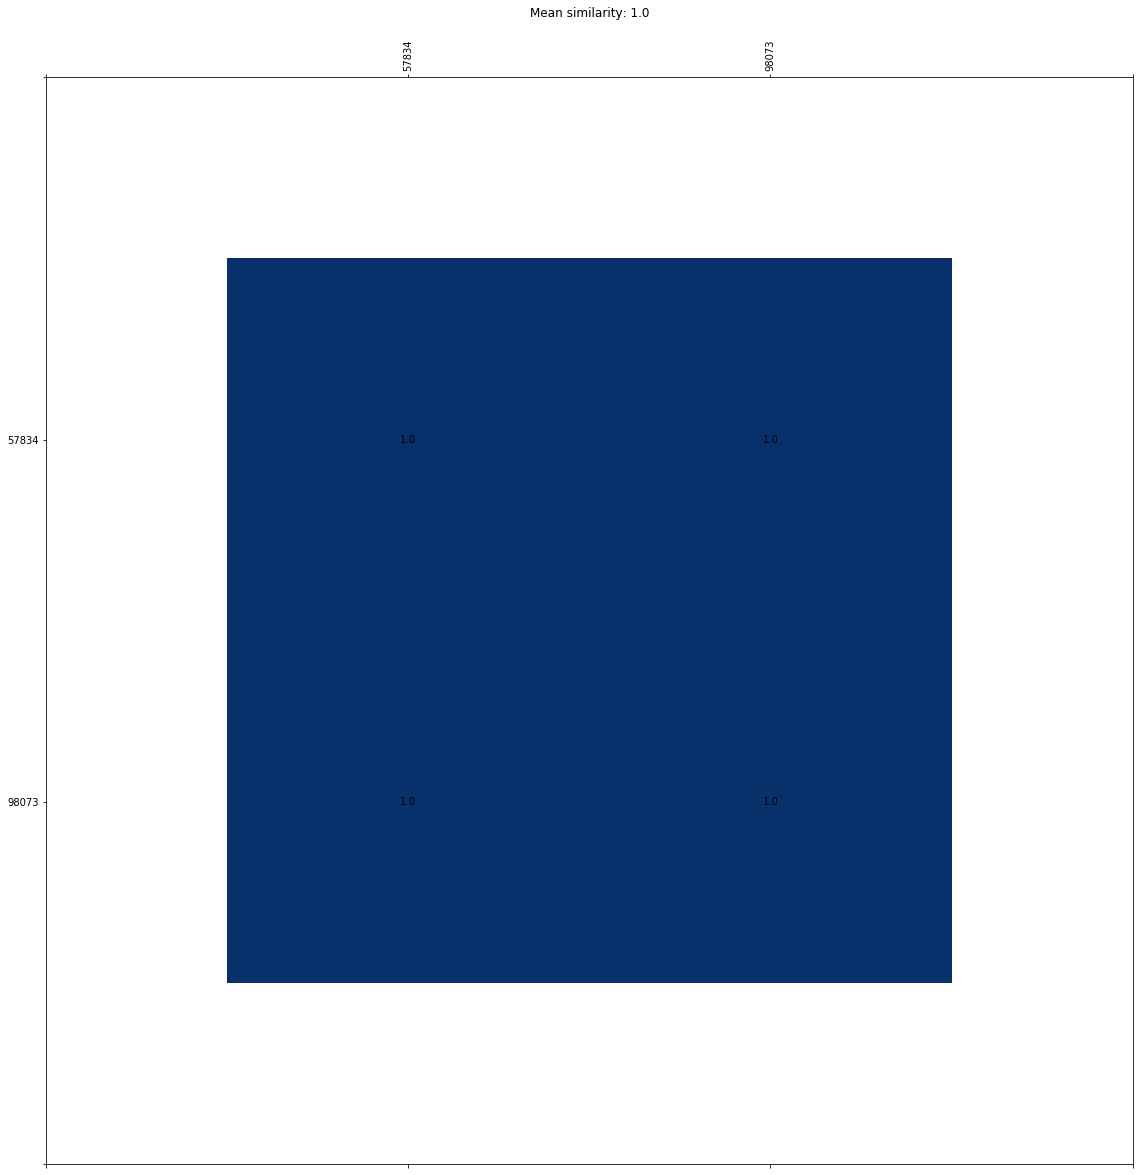

In [95]:
ids = suspicious_ids[np.where(np.array(clusters) == 58)]
clust_dict = dd.dict_by_ids(article_df,  ids)

for i in ids:
    print(f"____\n Paywall?: {article_df.loc[i, ['paywall']].iloc[0]} | Publisher: {article_df.loc[i, ['publisher']].iloc[0]} | Length: {len(str(clust_dict[i]))}")
    print(clust_dict[i], "\n")

clust_sim_mat = dd.similarity_mat(clust_dict)
utils.display_mat(clust_sim_mat, xlabs = list(ids))
plt.title(f"Mean similarity: {np.mean(clust_sim_mat)}")

0.797979797979798
Reports: Justice Dept. preparing antitrust probe of Google
 Jun 1, 2019 at 11:43 AM Jun 1, 2019 at 11:43 AM
 WASHINGTON (AP) " The U.S. Justice Department is readying an investigation of Google's business practices and whether they violate antitrust law, according to news reports.
 The search giant was fined a record $2.72 billion by European regulators in 2017 for abusing its dominance of the online search market. In the U.S., the Federal Trade Commission made an antitrust investigation of Google but closed it in 2013 without taking action.
 Now the Justice Department has undertaken an antitrust probe of the company's search and other businesses, according to reports by The Wall Street Journal, The New York Times and Bloomberg News. They cited unnamed people familiar with the matter.
 A Google spokeswoman didn't immediately respond to a request for comment from The Associated Press. Justice Department spokespeople couldn't immediately be reached.
 Never miss a story


[[0, 0], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]]

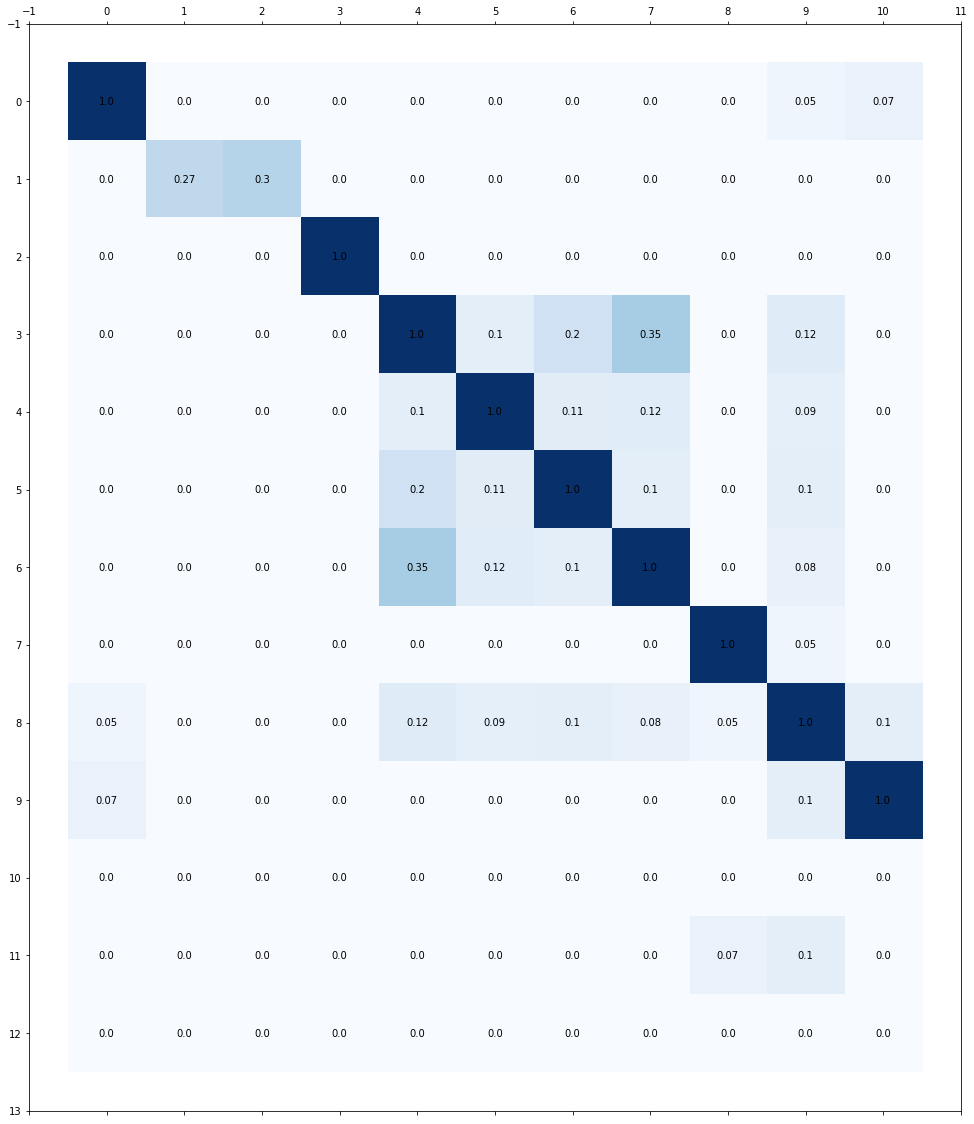

In [90]:
id1 = ids[0]
id2 = ids[2]

doc1 = sample_dict[id1]
doc2 = sample_dict[id2]
jac_mat = dd.get_jaccard_matrix(doc1, doc2)
utils.display_mat(jac_mat)
print(dd.jaccard_score())
print(doc1, "\n\n\n")
print(doc2)
dd.print_sentence_matches(visualize = True)

For 'bad' events (> .25 bad articles)

###
Processing event 3 with 876/3280 bad articles, 0.10s elapsed
###

0 of 50 rows completed, 0.00m elapsed

Event 3 unique bad article examples:

EX0 WV: POLICE SEARCHING FOR 15-FOOT LONG PYTHON 
 Jun 1, 2019 
 Giant escaped python is causing fear among some West Virginia residents while it remains on the loose. 
 TownNews.com Content Exchange

EX1 Get WND's mobile app for free.    Then choose the option to add this bookmark to your home screen.     Editor's note:Do you need something to smile about?     Editor's note:Do you need something to smile about? Every day, WND selects the best joke offered up by readers and contributors to its Laughlines more…

EX2 Error 403 : Access Denied 
 The access to this location          (/wiki/Jose_Antonio_Reyes)         is denied.              
 Otherwise, please return to the page you were at before.

EX3 Adrian Grenier and Sarah Carter 
 Connect any two celebrities to see how closely they are linked... roman

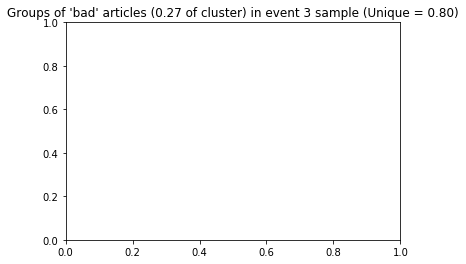

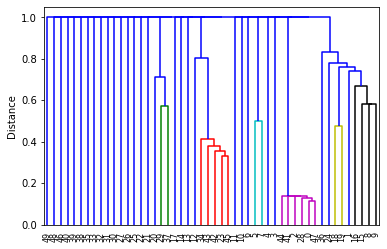

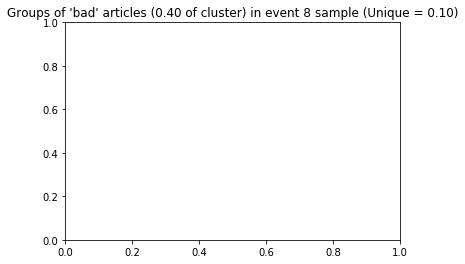

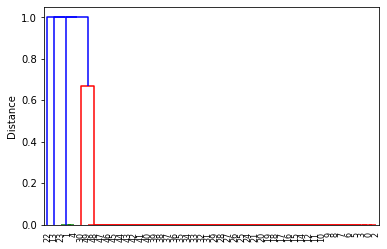

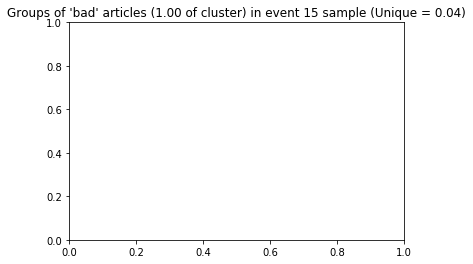

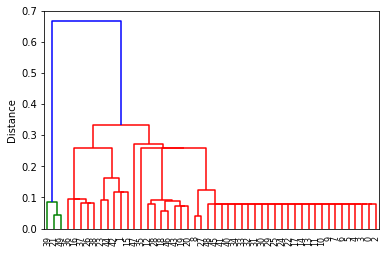

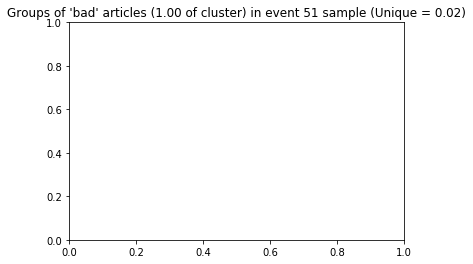

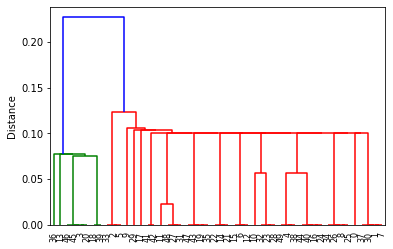

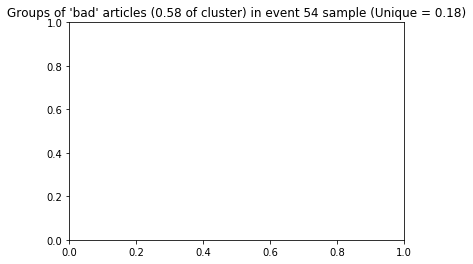

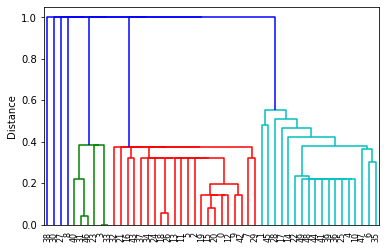

In [42]:
start = time.time()
print("For 'bad' events (> .25 bad articles)")
for event in bad_events:
    event_df = article_df.loc[article_df["event"] == event, ]
    bad_articles = list(event_df.loc[event_df["paywall"] > 0, "id"])
    print("\n###\nProcessing event %d with %d/%d bad articles, %.2fs elapsed\n###\n" % (event, len(bad_articles), len(event_df), time.time() - start))
    bad_dict = dd.dict_by_ids(article_df, random.sample(bad_articles, min(50, len(bad_articles))))
    sim_mat = dd.similarity_mat(bad_dict)
    plt.figure()
    plt.title("Groups of 'bad' articles (%.2f of cluster) in event %d sample (Unique = %.2f)" % (len(bad_articles)/len(event_df), event, dd.prop_unique_clusters()))
    dd.cluster_articles(sim_mat, plot = True)
    print("\nEvent %d unique bad article examples:" % (event))
    clusters = dd.get_cluster_assignments()
    for i in np.unique(clusters):
        print("\nEX%d" % (i), event_df.loc[event_df["id"] == bad_articles[np.where(clusters == i)[0][0]], "text"].iloc[0])

In [ ]:
start = time.time()
print("For 'good' events")
for event in set(event_names) - set(bad_events):
    event_df = article_df.loc[article_df["event"] == event, ]
    bad_articles = list(event_df.loc[event_df["paywall"] > 0, "id"])
    print("\n###\nProcessing event %d with %d/%d bad articles, %.2fs elapsed\n###\n" % (event, len(bad_articles), len(event_df), time.time() - start))
    bad_dict = dd.dict_by_ids(article_df, random.sample(bad_articles, min(50, len(bad_articles))))
    sim_mat = dd.similarity_mat(bad_dict)
    plt.figure()
    dd.cluster_articles(sim_mat, plot = True)
    plt.title("Groups of 'bad' articles (%.2f of cluster) in event %d sample (Unique = %.2f)" % (len(bad_articles)/len(event_df), event, dd.prop_unique_clusters()))
    print("\nEvent %d unique bad article examples:" % (event))
    clusters = dd.get_cluster_assignments()
    for i in np.unique(clusters):
        print("\nEX%d\n" % (i), event_df.loc[event_df["id"] == bad_articles[np.where(clusters == i)[0][0]], "text"].iloc[0])

In [40]:
# For articles not in the top 50 events:
bad_prop = np.mean(article_df.loc[np.isnan(article_df["event"]), "paywall"] > 0)
bad_n = np.sum(article_df.loc[np.isnan(article_df["event"]), "paywall"] > 0) 
good_n = np.sum(article_df.loc[np.isnan(article_df["event"]), "paywall"] == 0)
print("For articles not in the top 50 events, %d/%d bad articles (%.2f)" % (bad_n, bad_n + good_n, bad_n/(bad_n+good_n)))

For articles not in the top 50 events, 16037/67632 bad articles (0.24)
